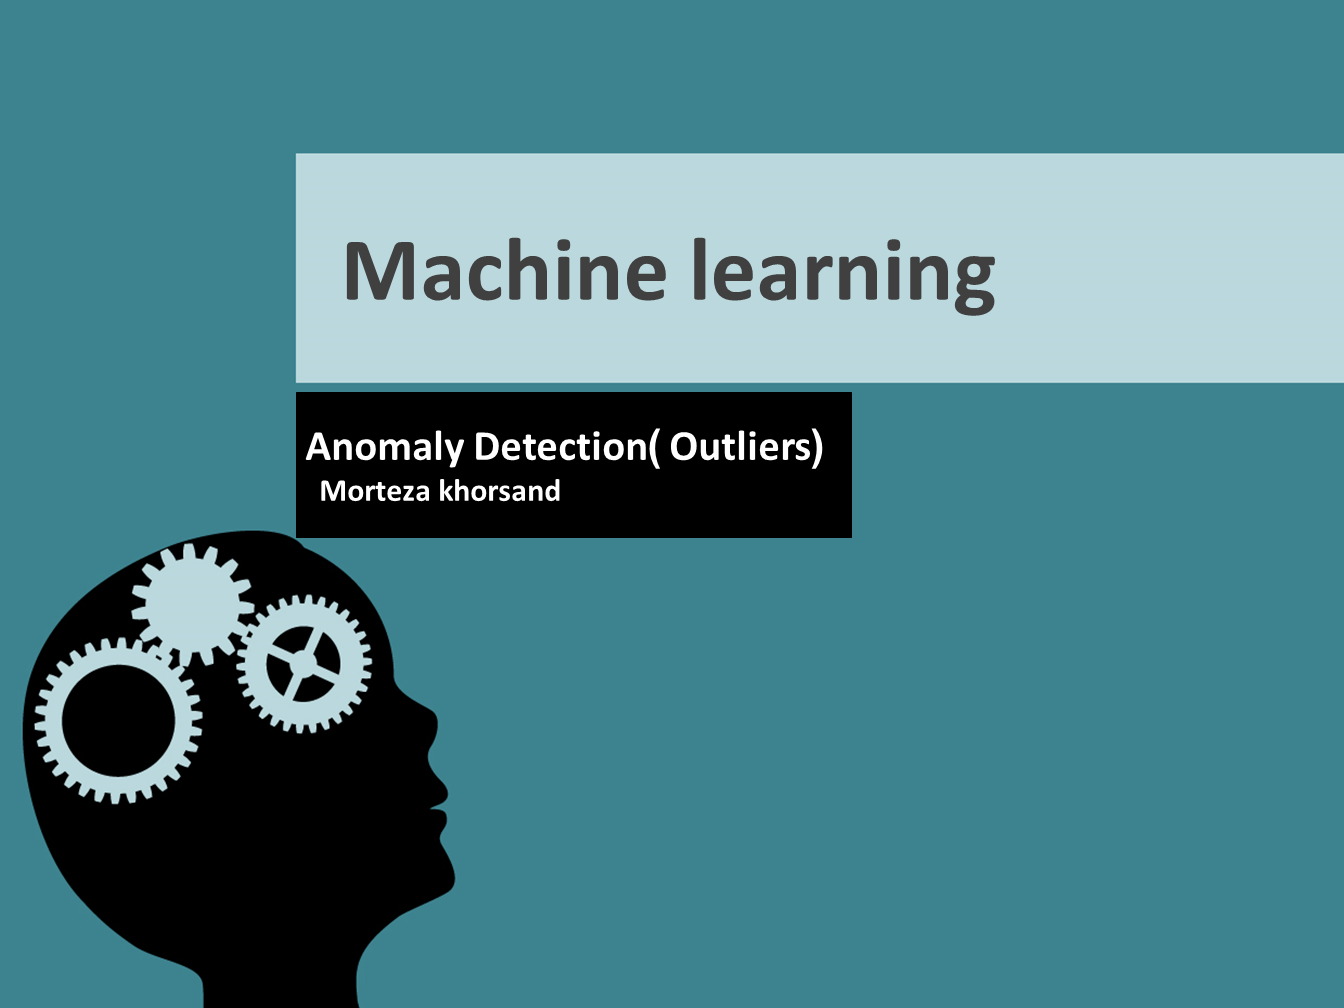

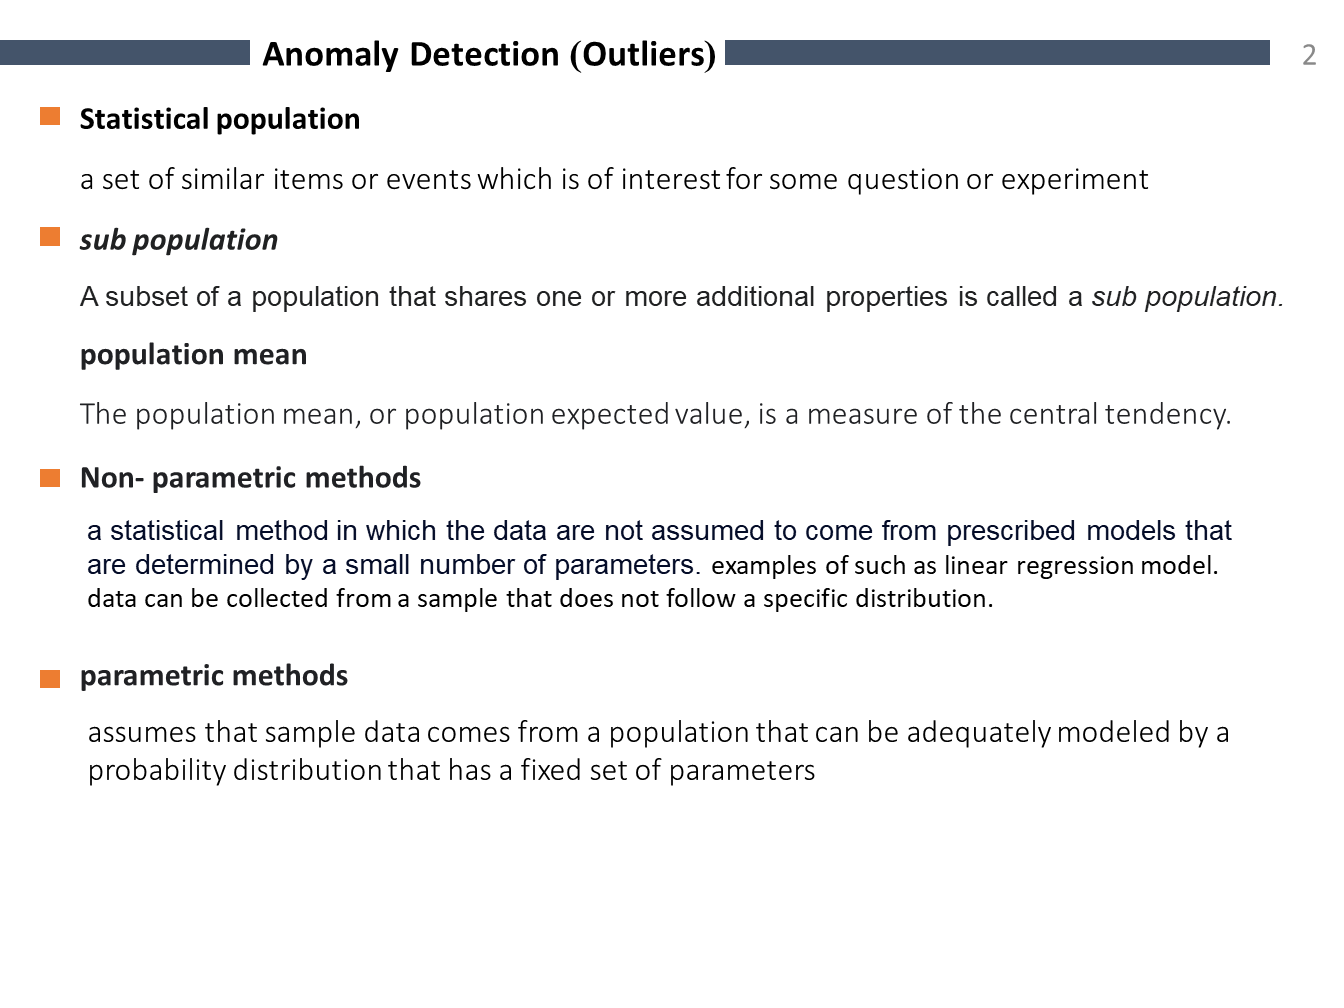

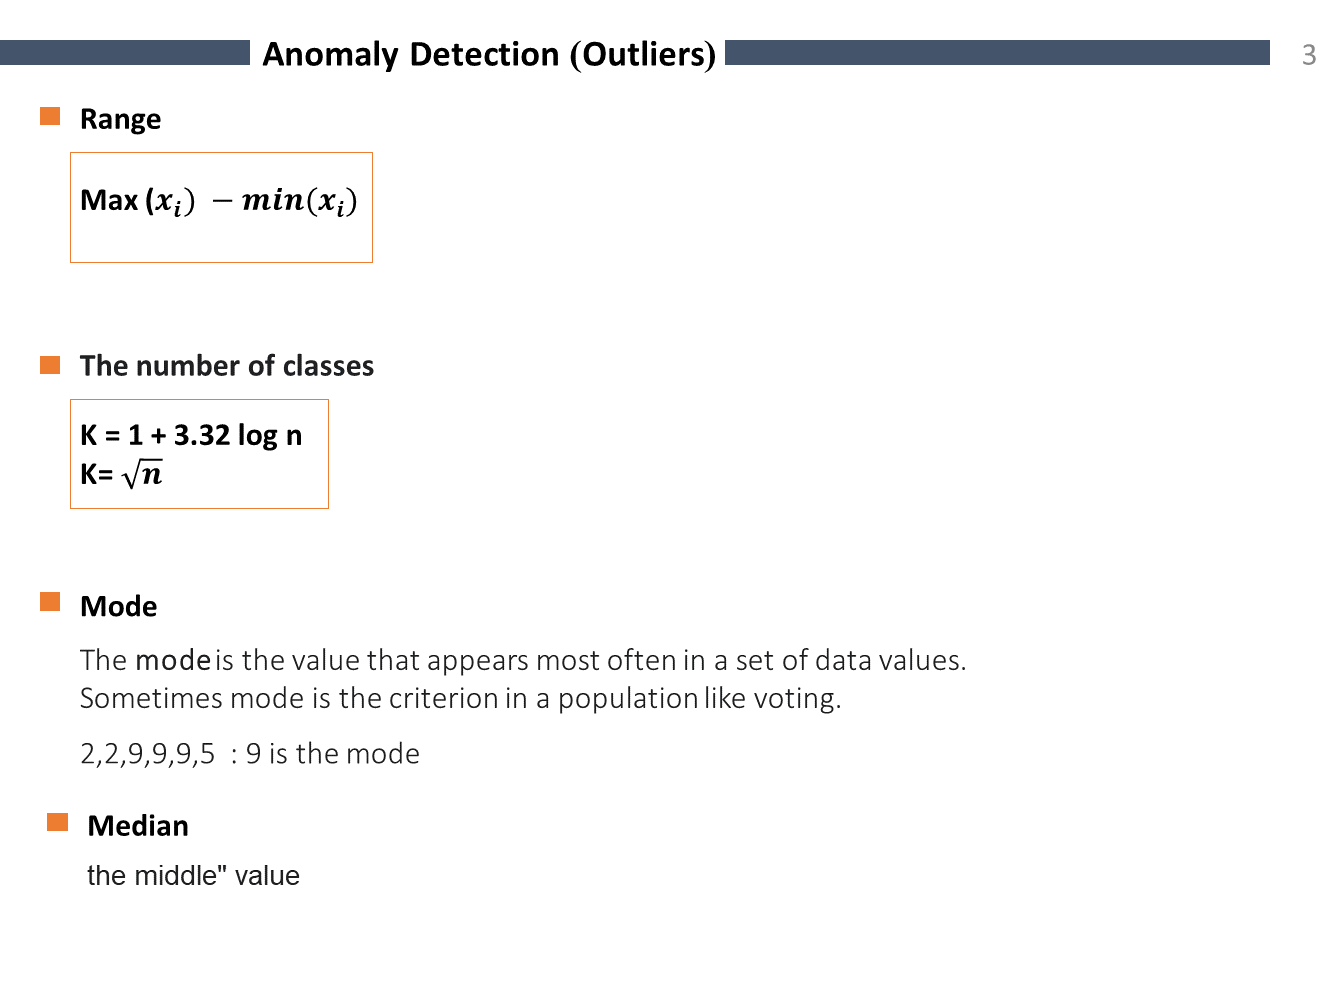

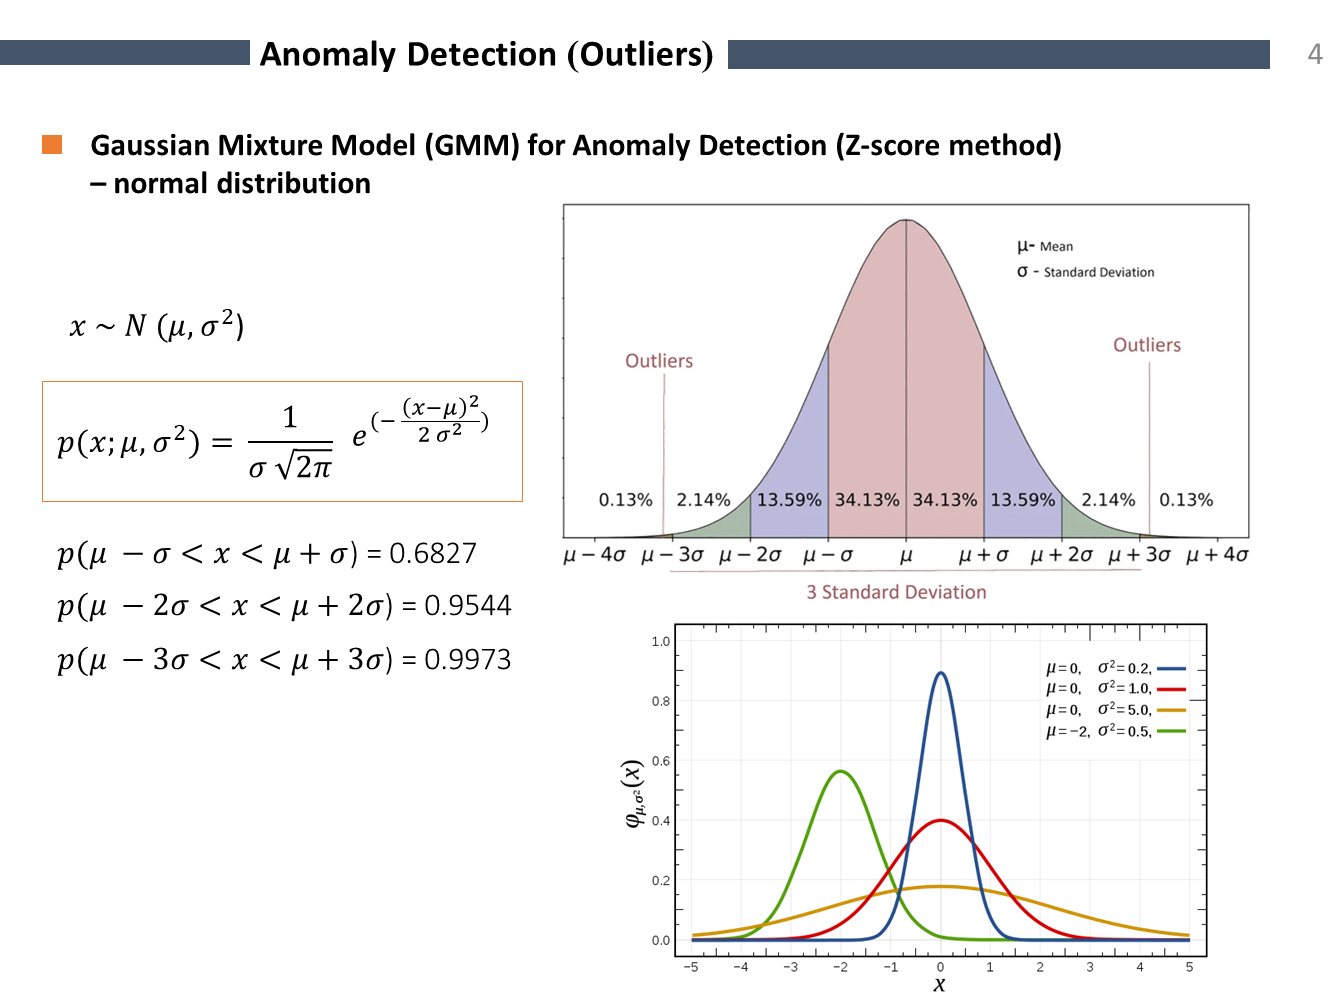

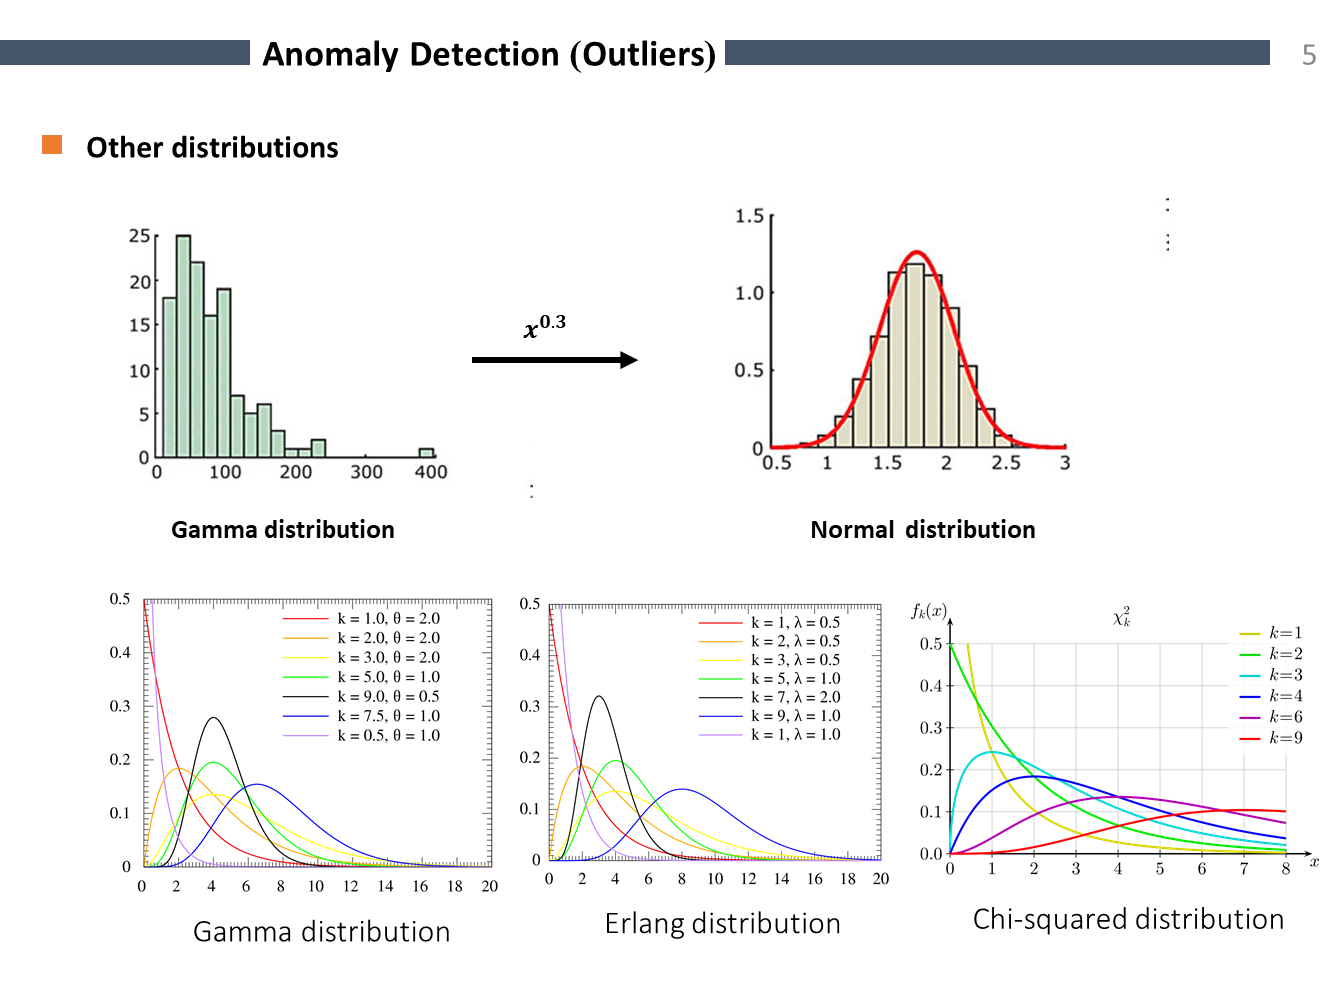

In [12]:
%matplotlib nbagg

import warnings
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import ipywidgets as widgets

from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import pinv
from scipy.stats import multivariate_normal

import seaborn as sns; sns.set()

plt.rcParams['figure.figsize'] = (4, 4)
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


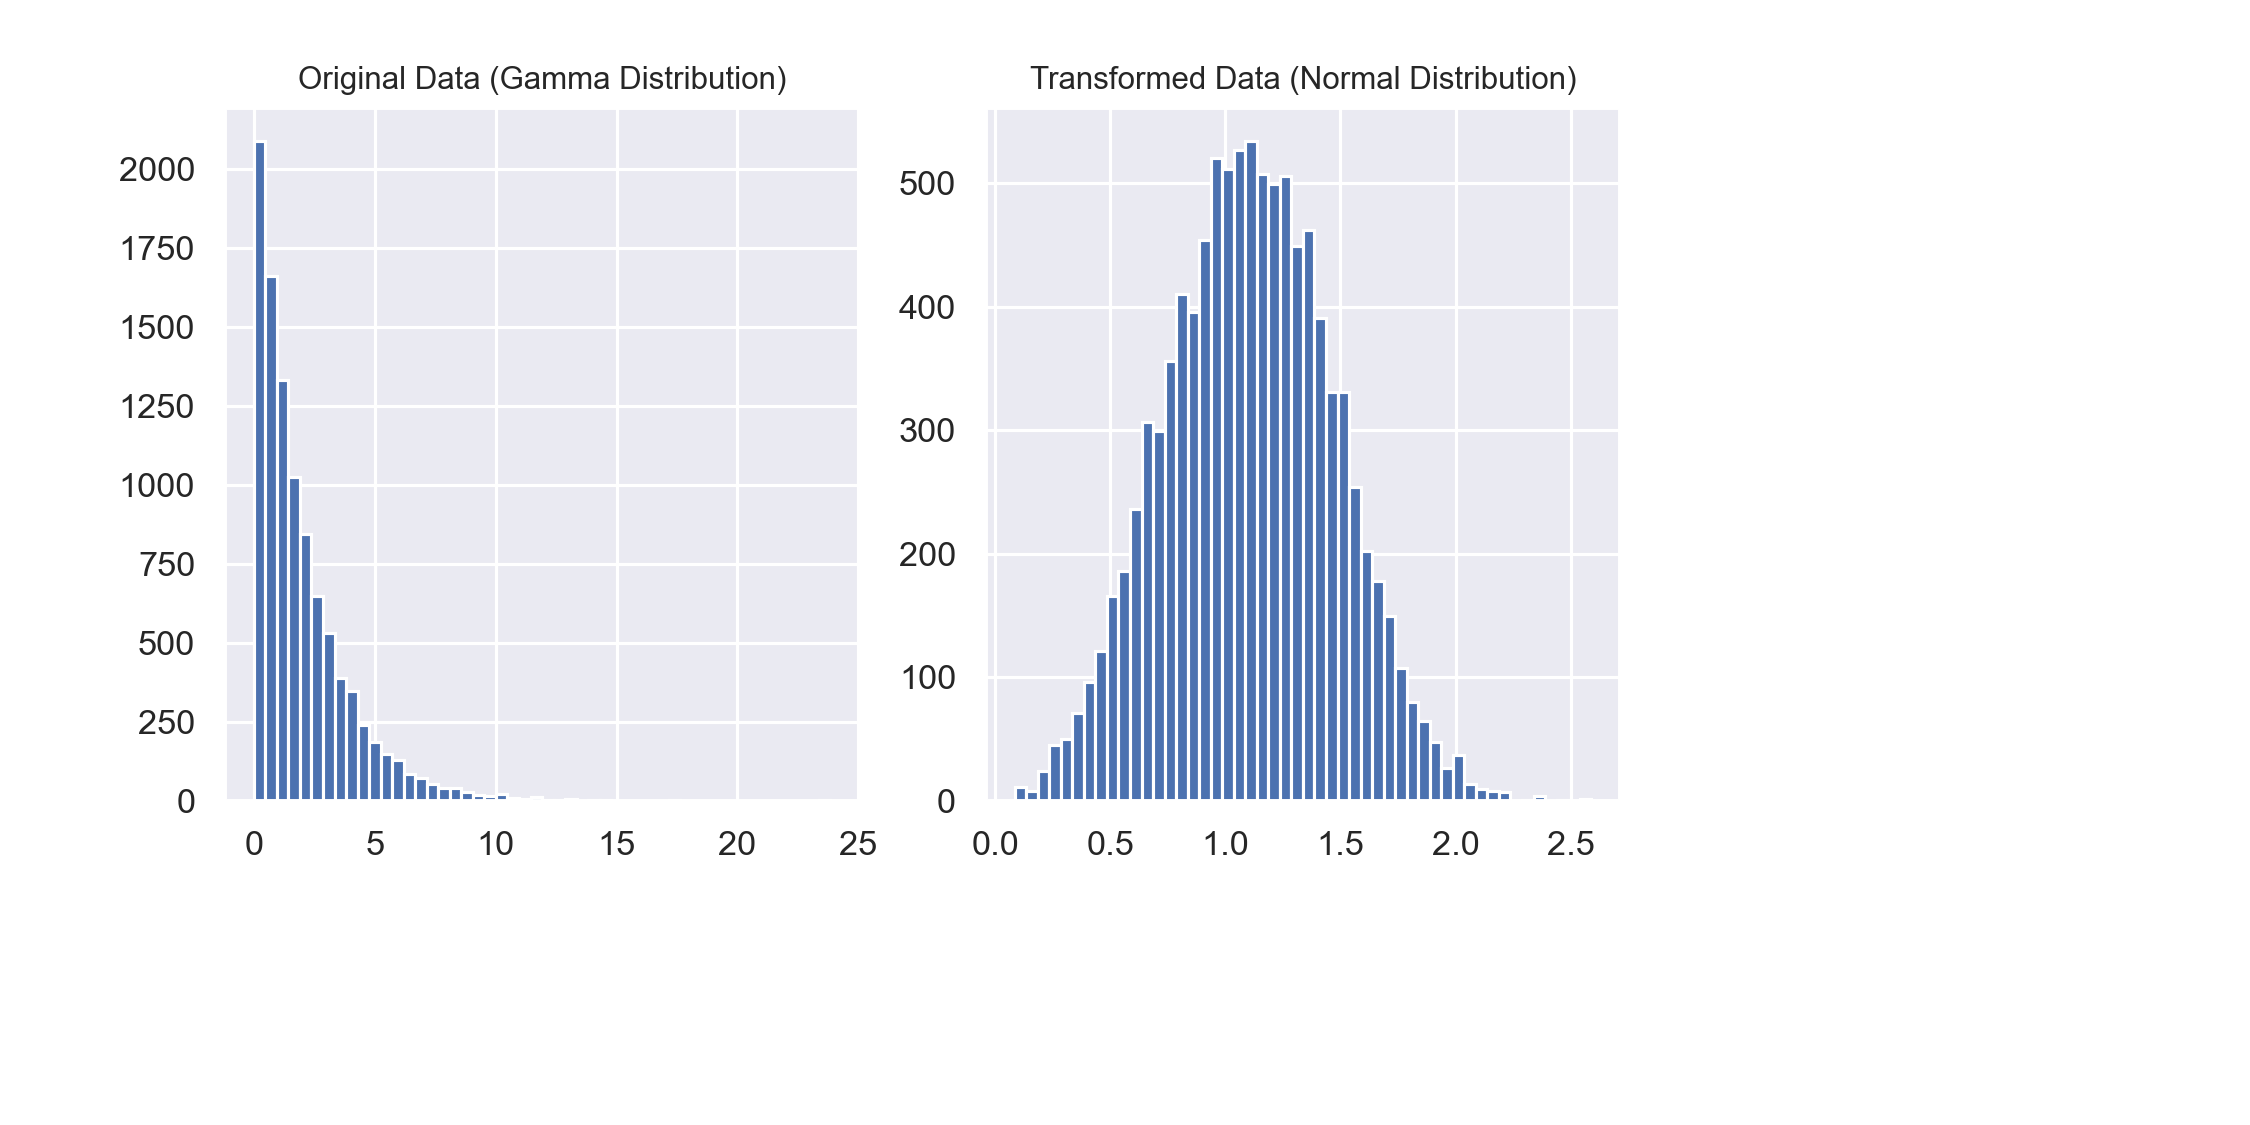

In [2]:
X1 = np.random.gamma(1, 2, size=(10000, 1))

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(X1, bins=50)
plt.title('Original Data (Gamma Distribution)', size=10)

plt.subplot(122)
plt.hist(X1 ** 0.3, bins=50)
plt.title('Transformed Data (Normal Distribution)', size=10)

plt.show()

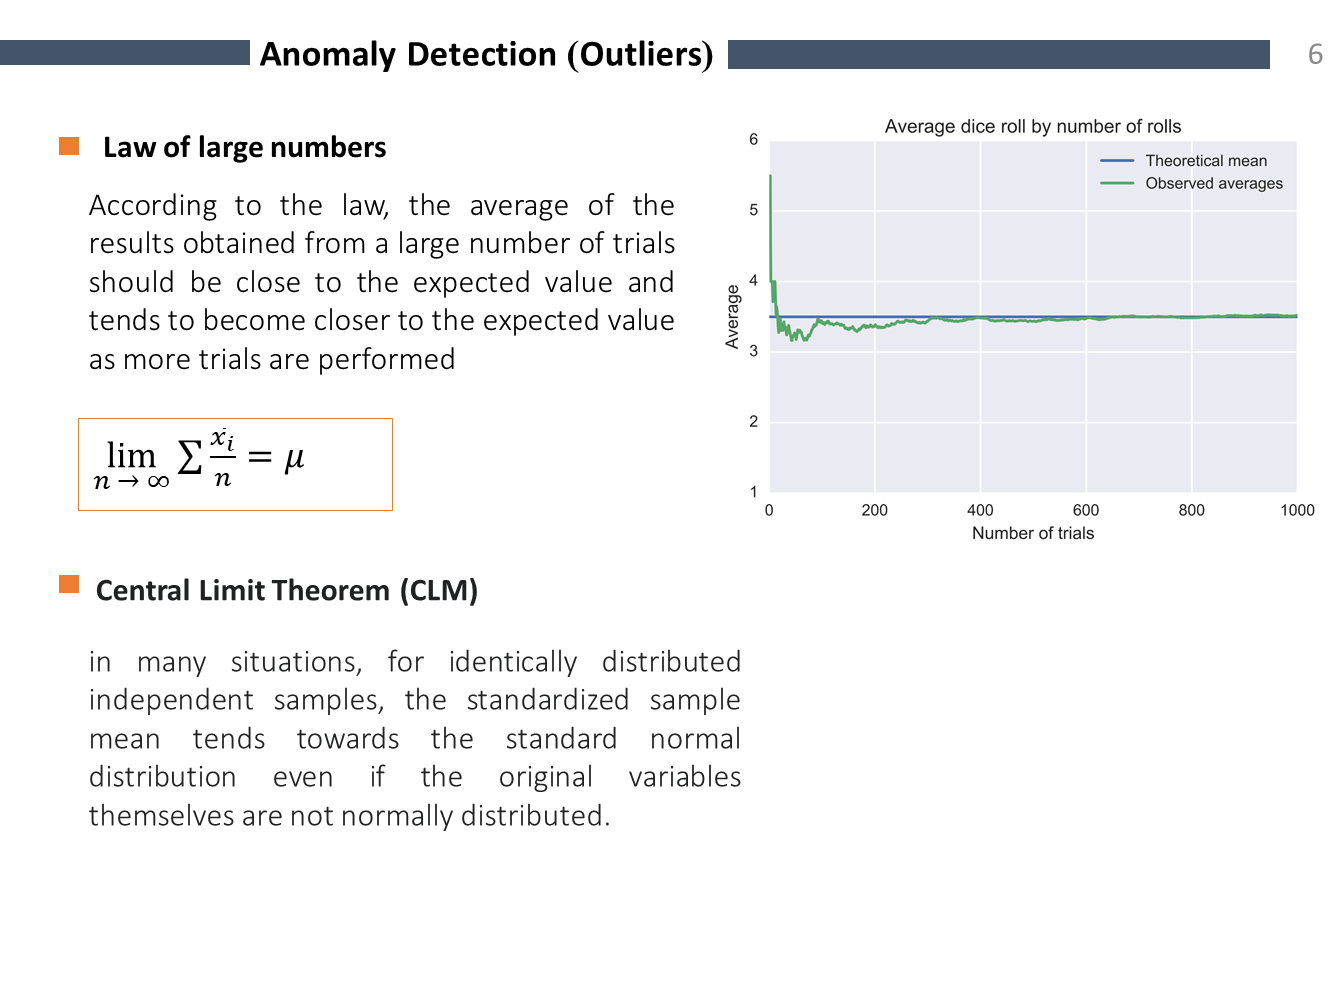

# Diffusion
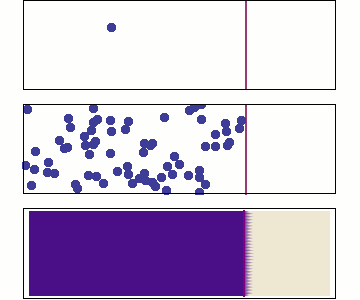








# law of large numbers
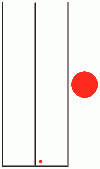

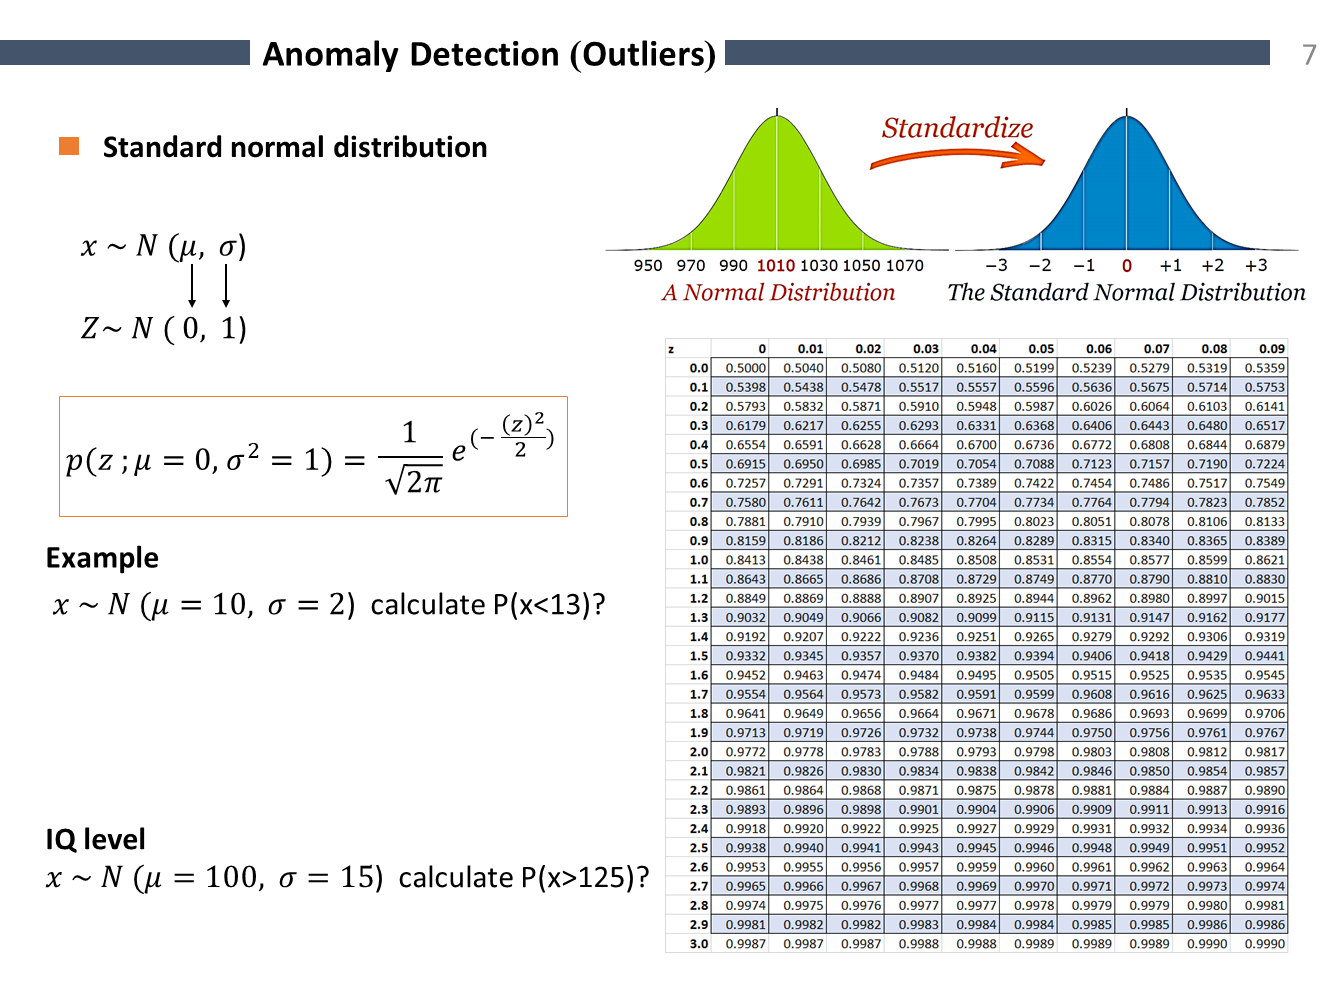

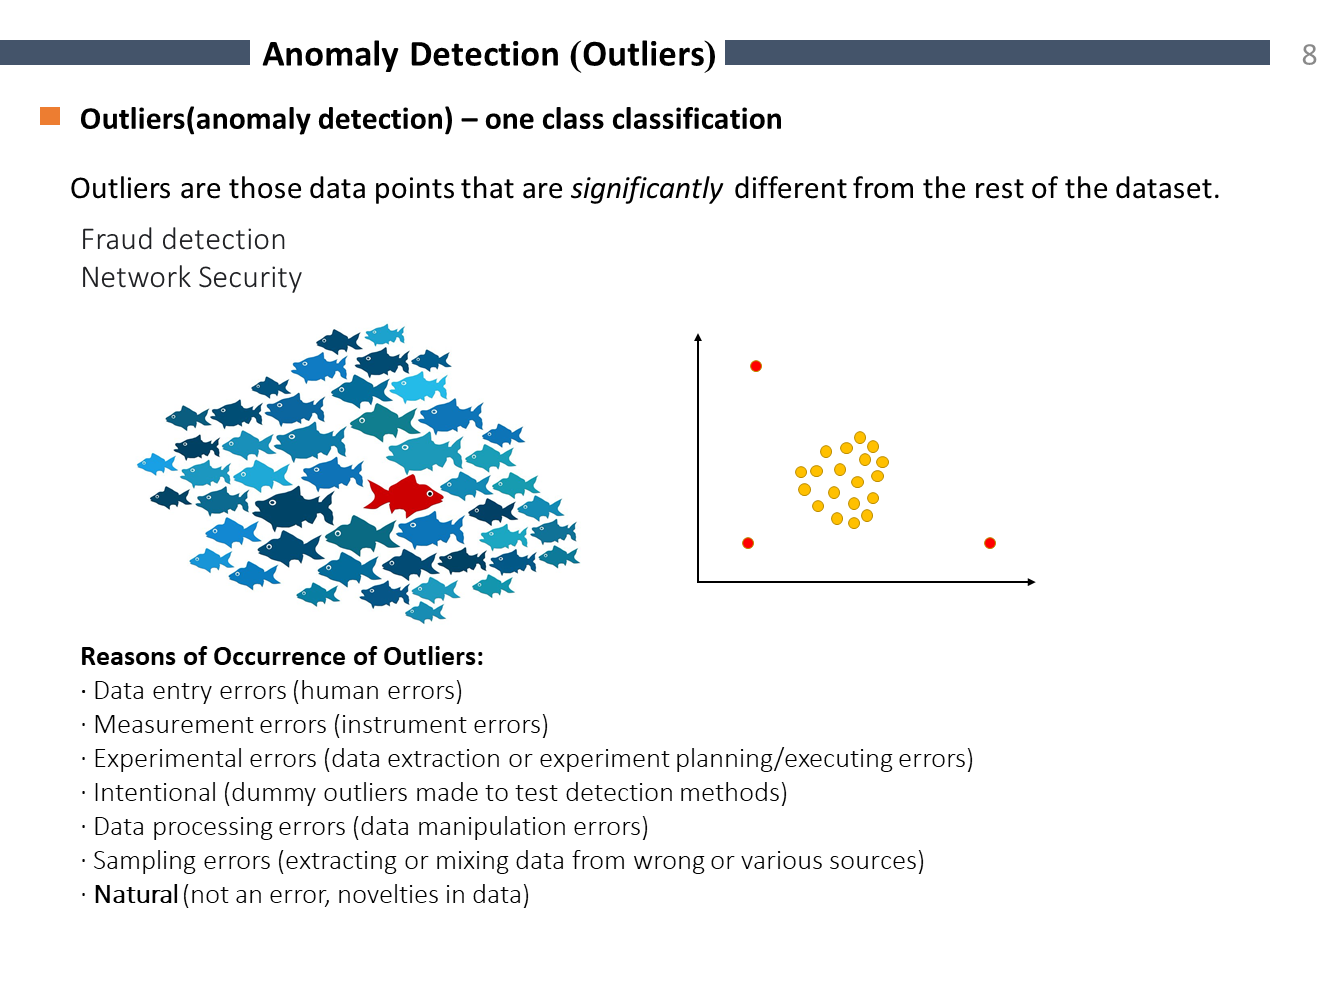

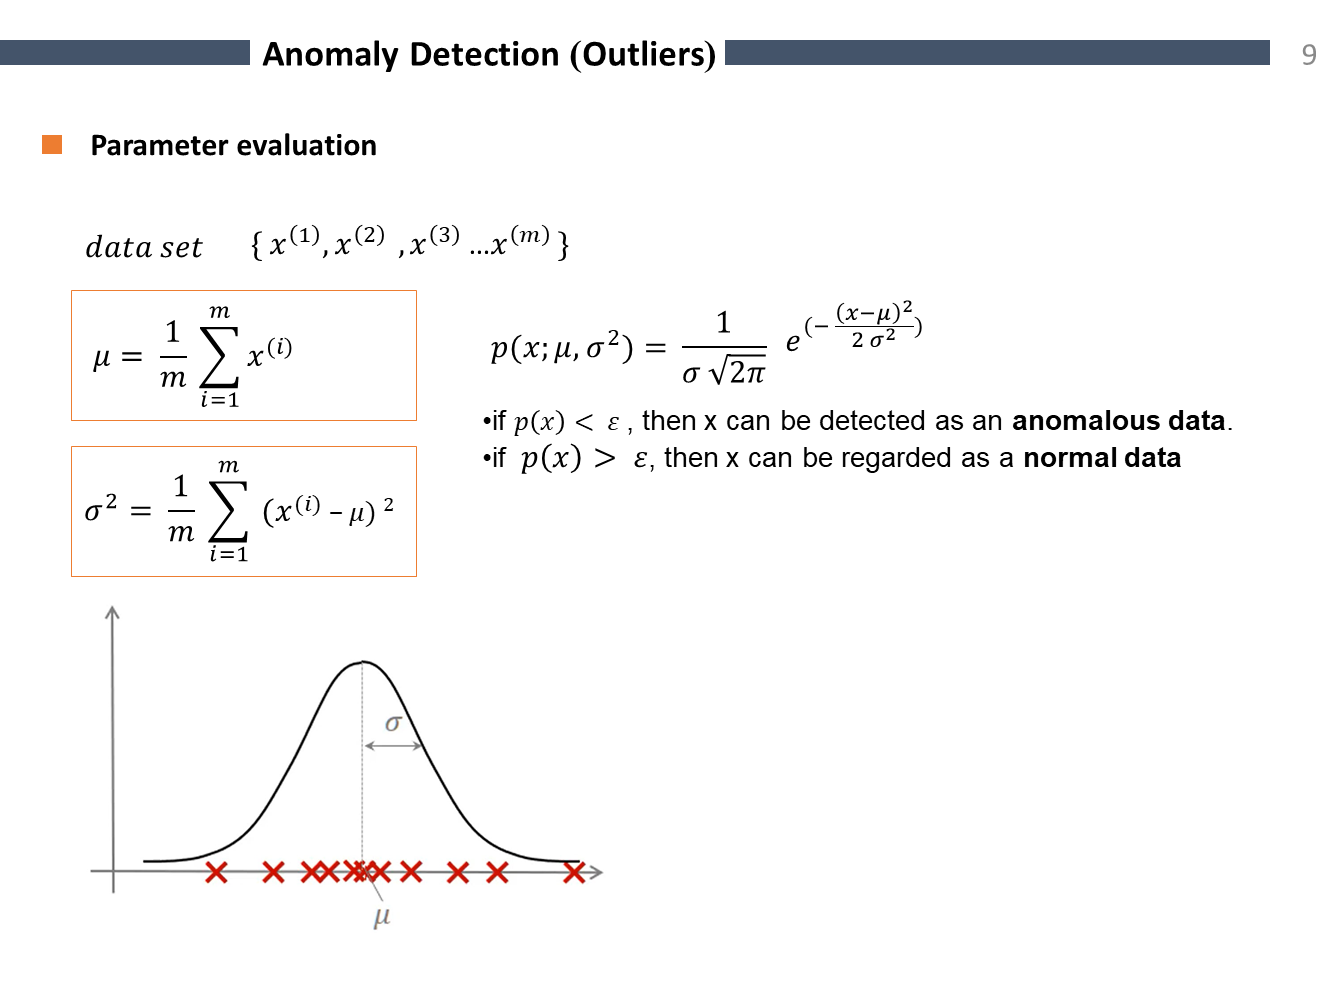

In [3]:
import numpy as np
np.printoptions(precision=2)
import numpy as np
def read_dataset(fname, delimiter=','):
    return np.genfromtxt(fname, delimiter=delimiter)

X = read_dataset(r"F:\machine learning\jozavat\anomally\1dimensional.csv")
print(X.shape)
print(X[:10])

(307,)
[13.05 13.41 14.2  14.91 13.58 13.92 12.82 15.68 16.16 12.67]


In [4]:
mu=X.mean()
print(mu)
Sigma=X.std()
print(Sigma)


14.112252768729643
1.3537642702832688


In [6]:
z= (X-mu) / Sigma
print(z.shape)
print(np.around(z[:10] , 3 ))



(307,)
[-0.79 -0.52  0.06  0.59 -0.4  -0.14 -0.95  1.16  1.51 -1.07]


<IPython.core.display.Javascript object>


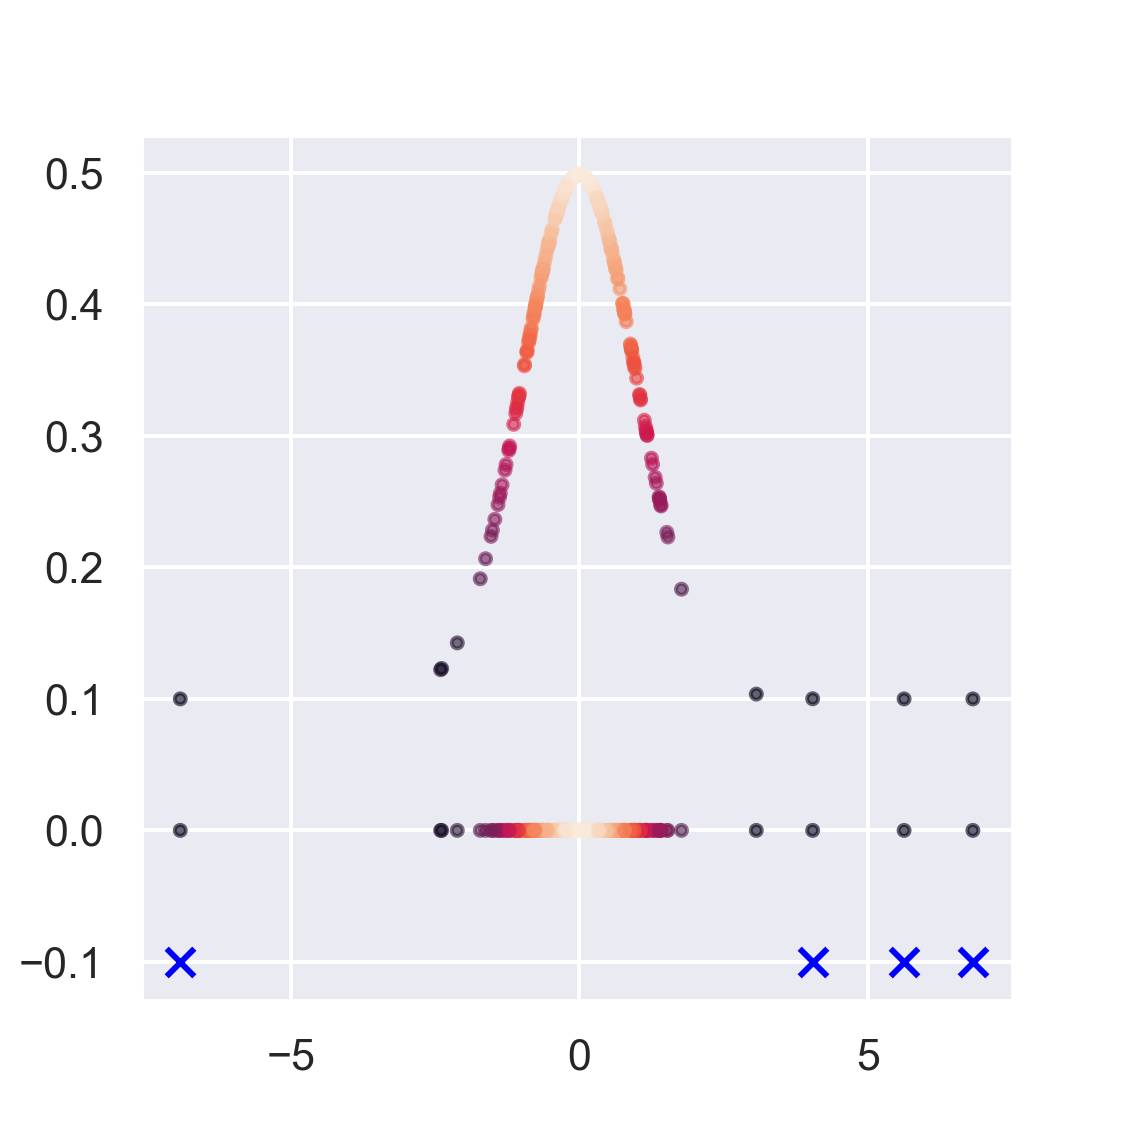

array([[301],
       [303],
       [304],
       [306]], dtype=int64)

In [10]:
from scipy.stats import norm

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

p_z = norm().pdf(z)       #probability density function 

outlier =z [p_z < 0.001]


plt.scatter(z , p_z +0.1, s=8, alpha=0.6, label='norm pdf' , c=p_z)

a=np.array([0 for i in  range(307)])
plt.scatter( z  , a , s= 8 , alpha = 0.6 , c=p_z)

b=a=np.array([0 for i in  range(outlier.shape[0])])
plt.scatter(outlier, b-.1, s=50, marker='x', c='blue', cmap='coolwarm')
plt.show()


np.argwhere(p_z < 0.001)

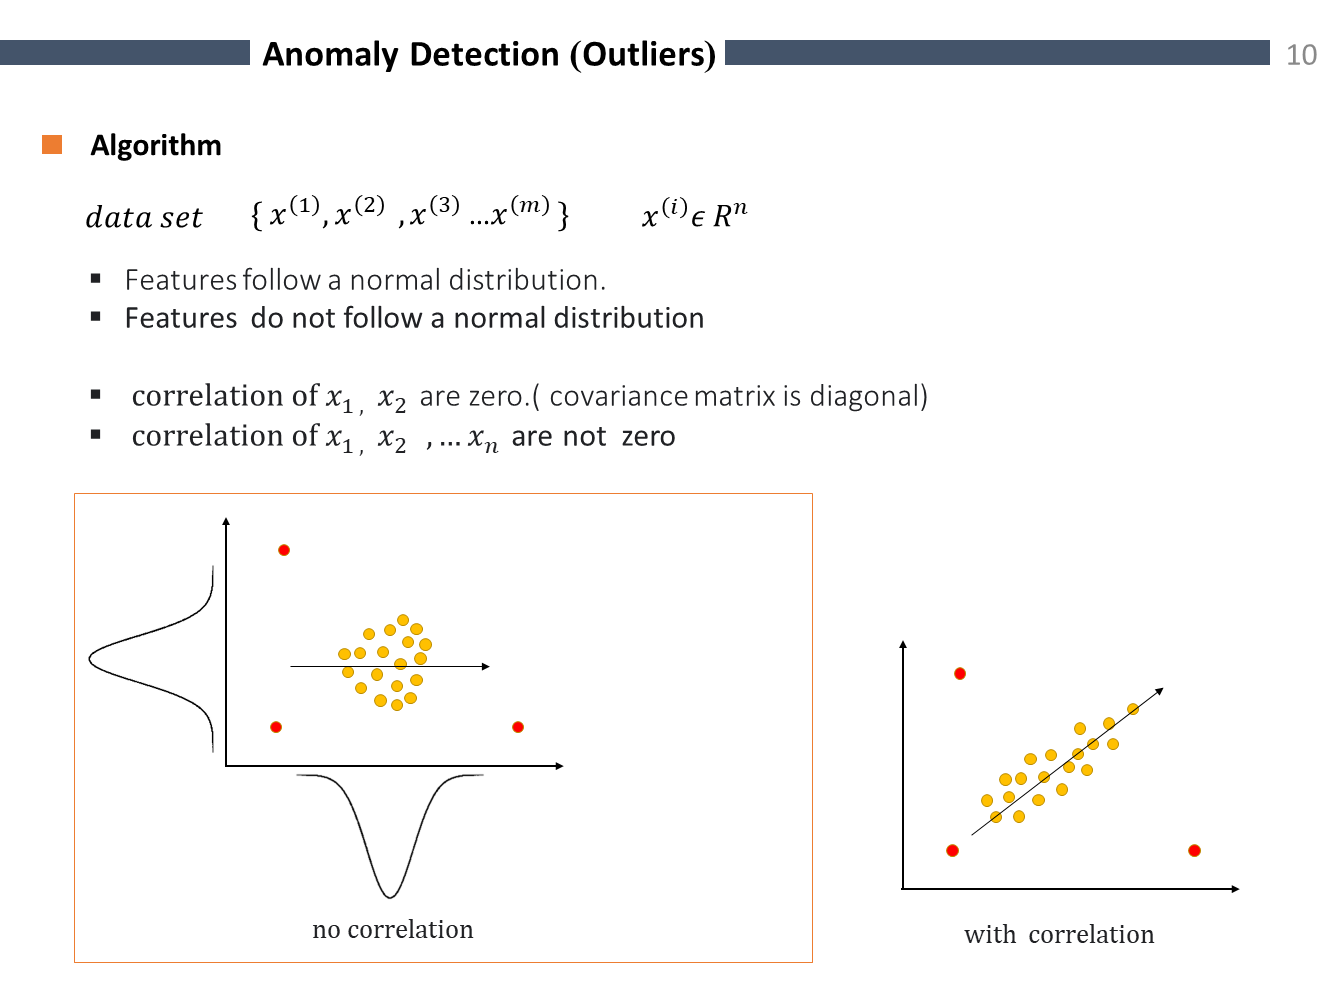

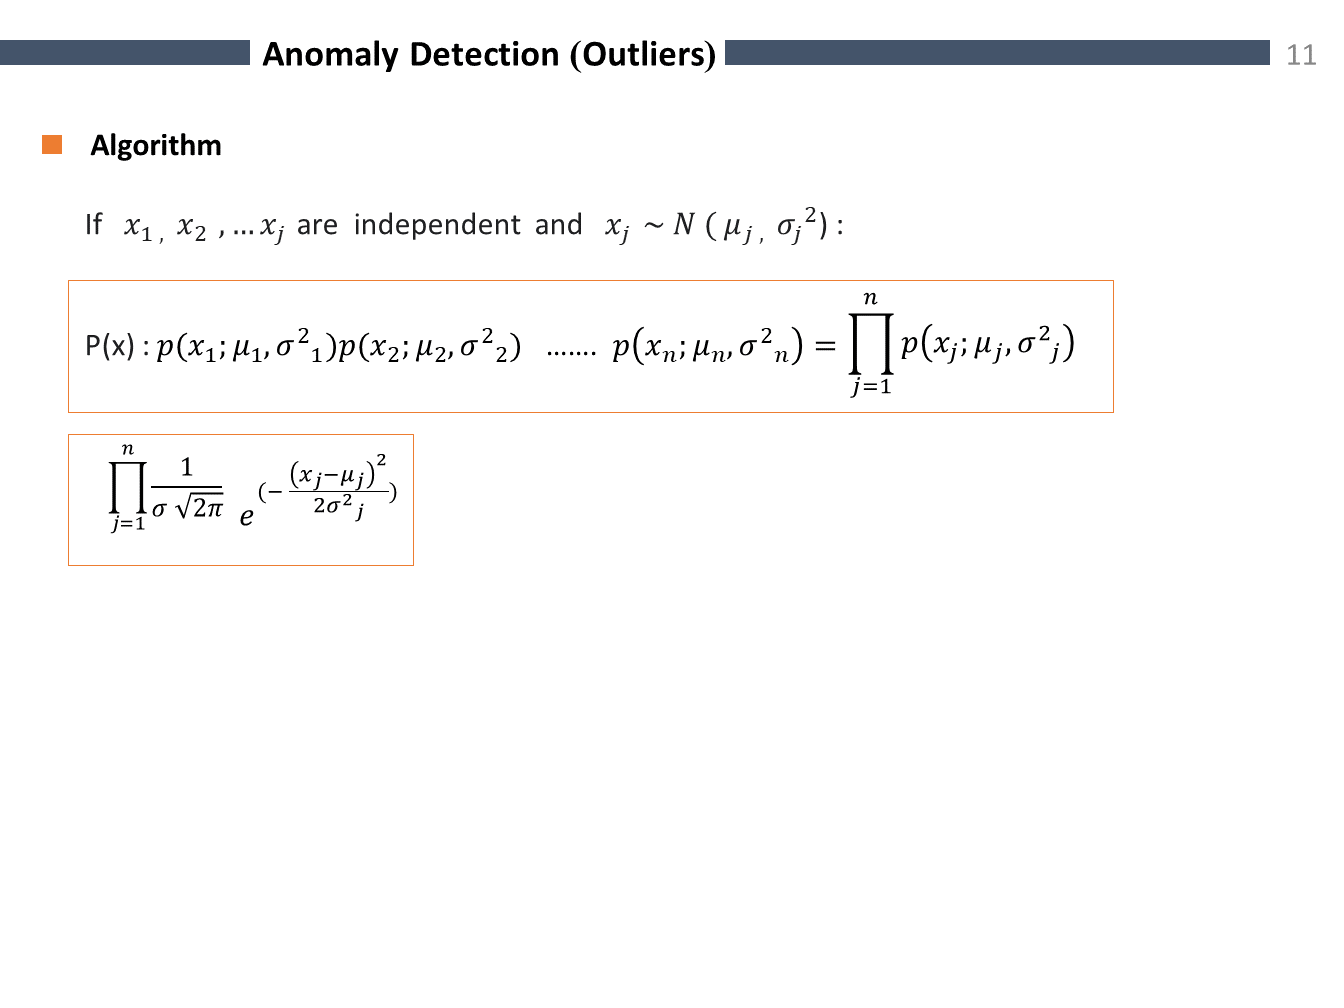

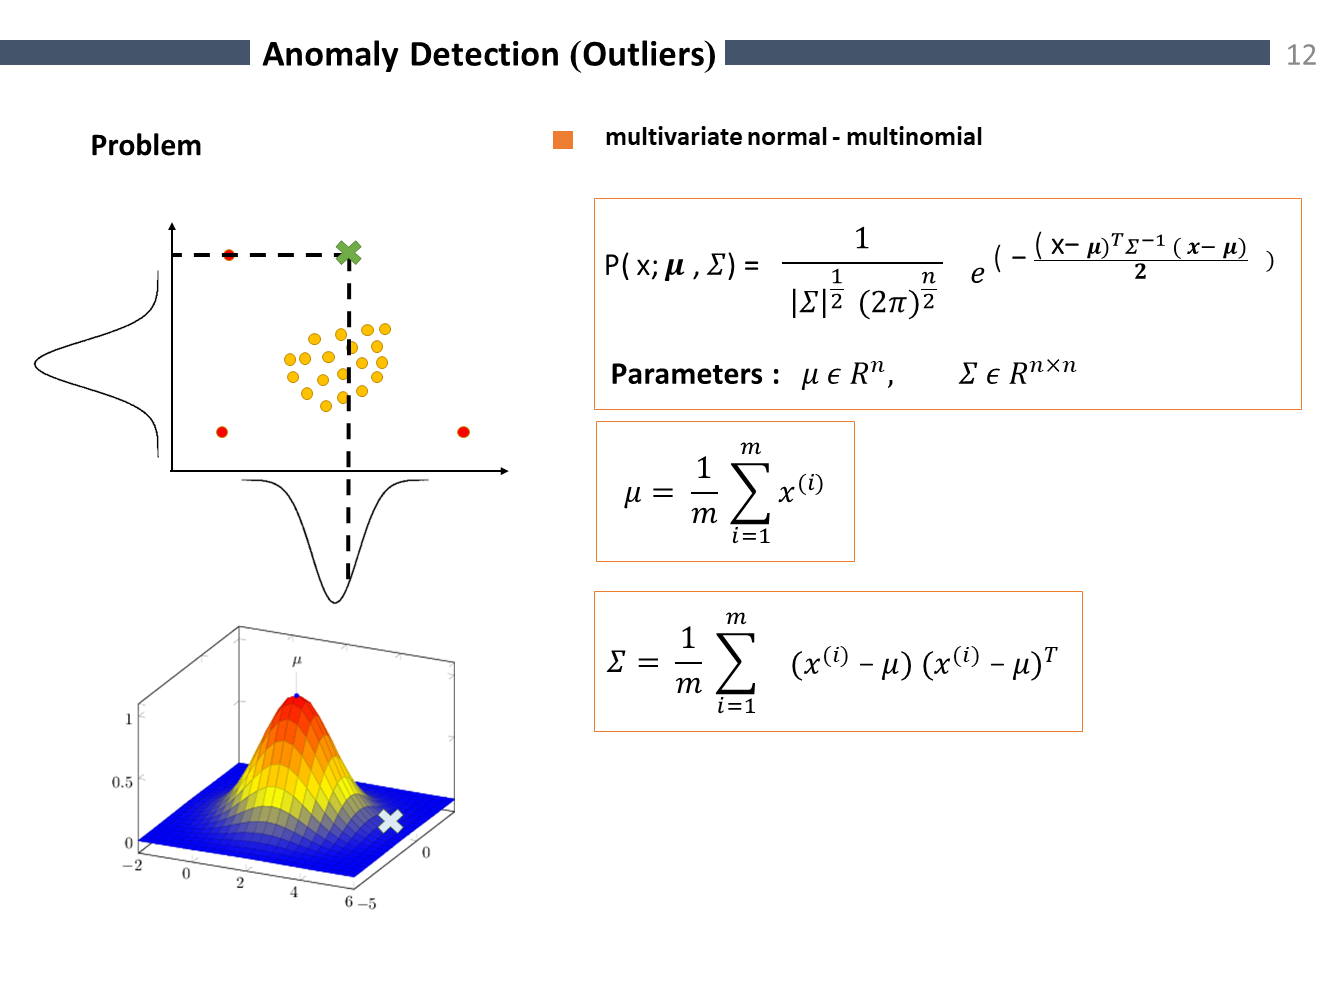

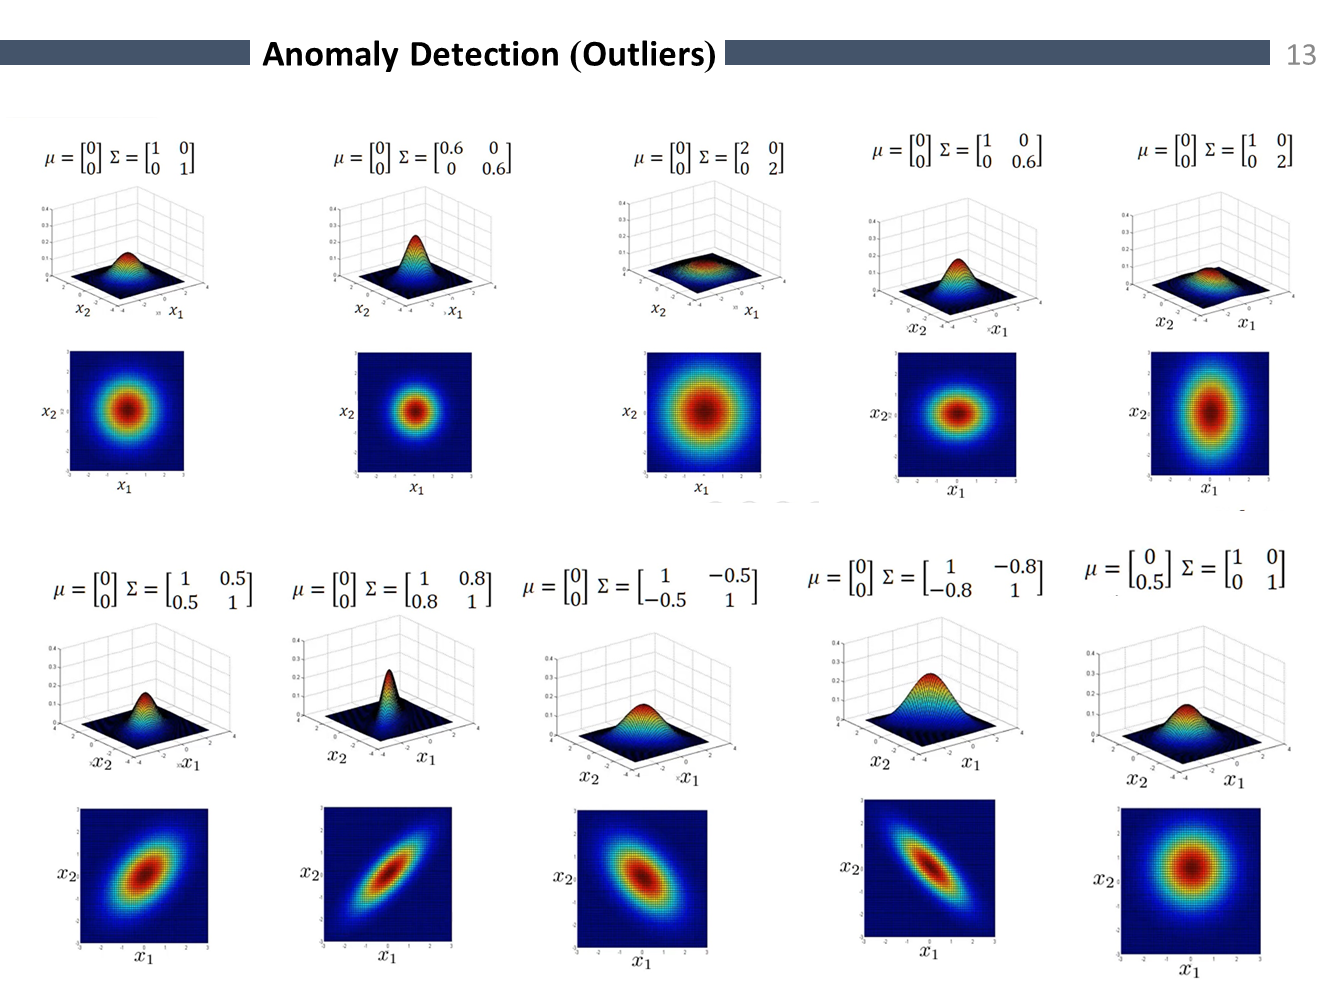

In [11]:
def read_dataset(fname, delimiter=','):
    return np.genfromtxt(fname, delimiter=delimiter)

X = read_dataset(r"F:\machine learning\jozavat\anomally\tr_server_data.csv")
print(X.shape)
print(X[:5])

(307, 2)
[[13.05 14.74]
 [13.41 13.76]
 [14.2  15.85]
 [14.91 16.17]
 [13.58 14.04]]


<IPython.core.display.Javascript object>


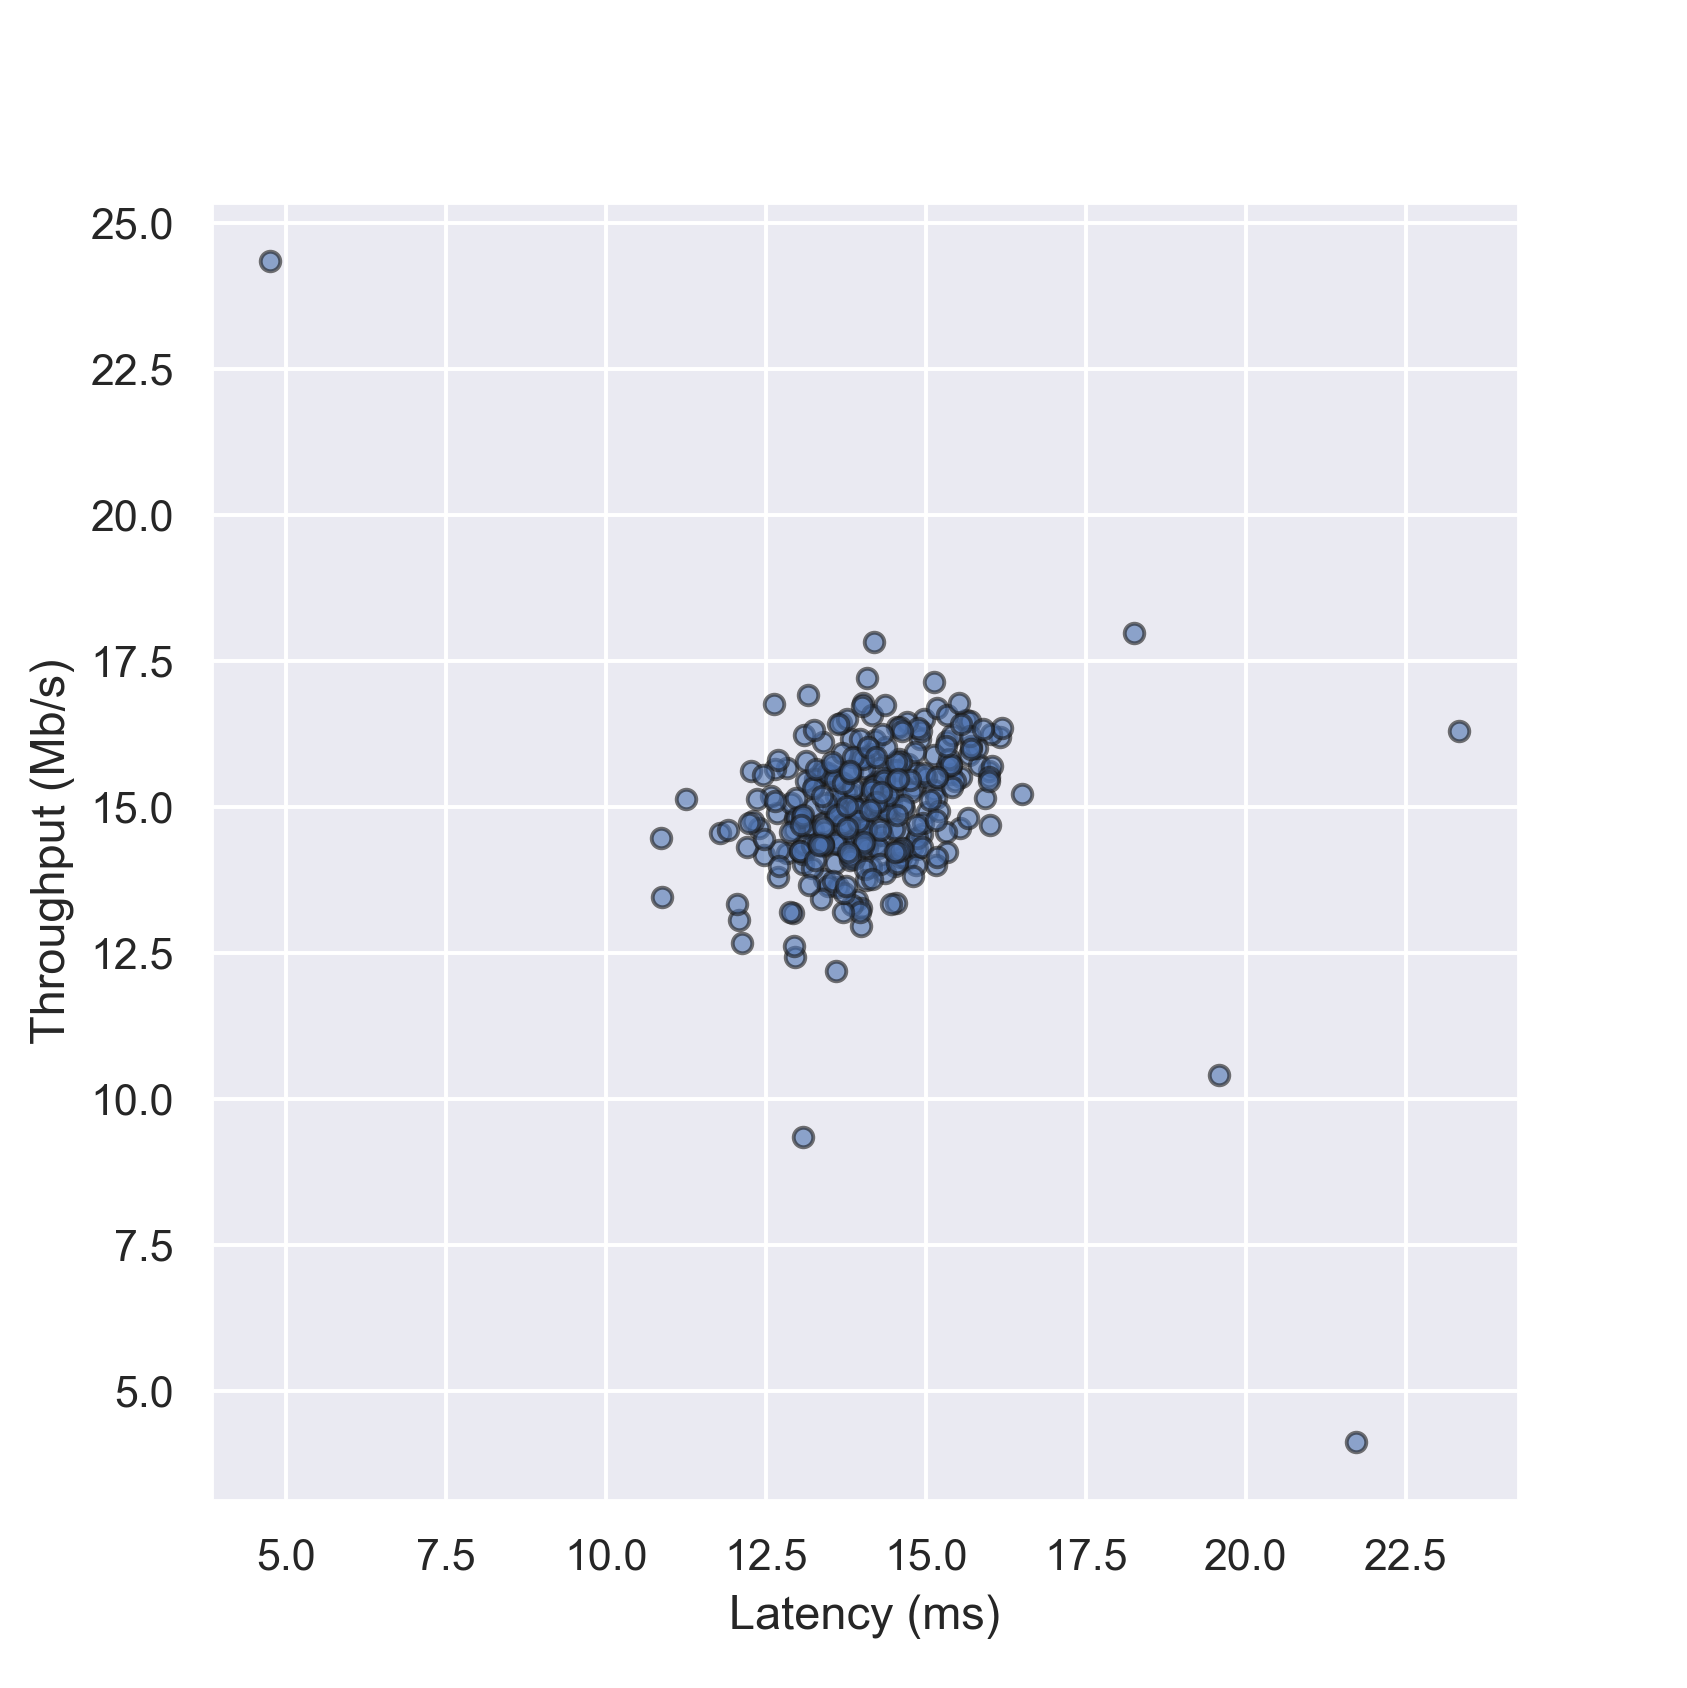

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=25, edgecolors='k', cmap='coolwarm', alpha=0.6)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (Mb/s)')
plt.show()



In [13]:
np.set_printoptions(precision=2)
mu = np.mean(X, axis=0)
m=X.shape[0]

Sigma= np.cov(X.T)     # sigma= ((X-mu).T @(X-mu)) * 1/m 



print('mu =\n {}'.format(mu))
print('Sigma =\n {}'.format(Sigma))

mu =
 [14.11 15.  ]
Sigma =
 [[ 1.84 -0.23]
 [-0.23  1.72]]


In [5]:
# defining the probabilistic model and computing 
# the probabilty of observing each data in training data
p = multivariate_normal(mean=mu, cov=Sigma).pdf(X)

# print the probabilities for the first 10 data
print(p.shape)
print(p[:10])

NameError: name 'multivariate_normal' is not defined

<IPython.core.display.Javascript object>


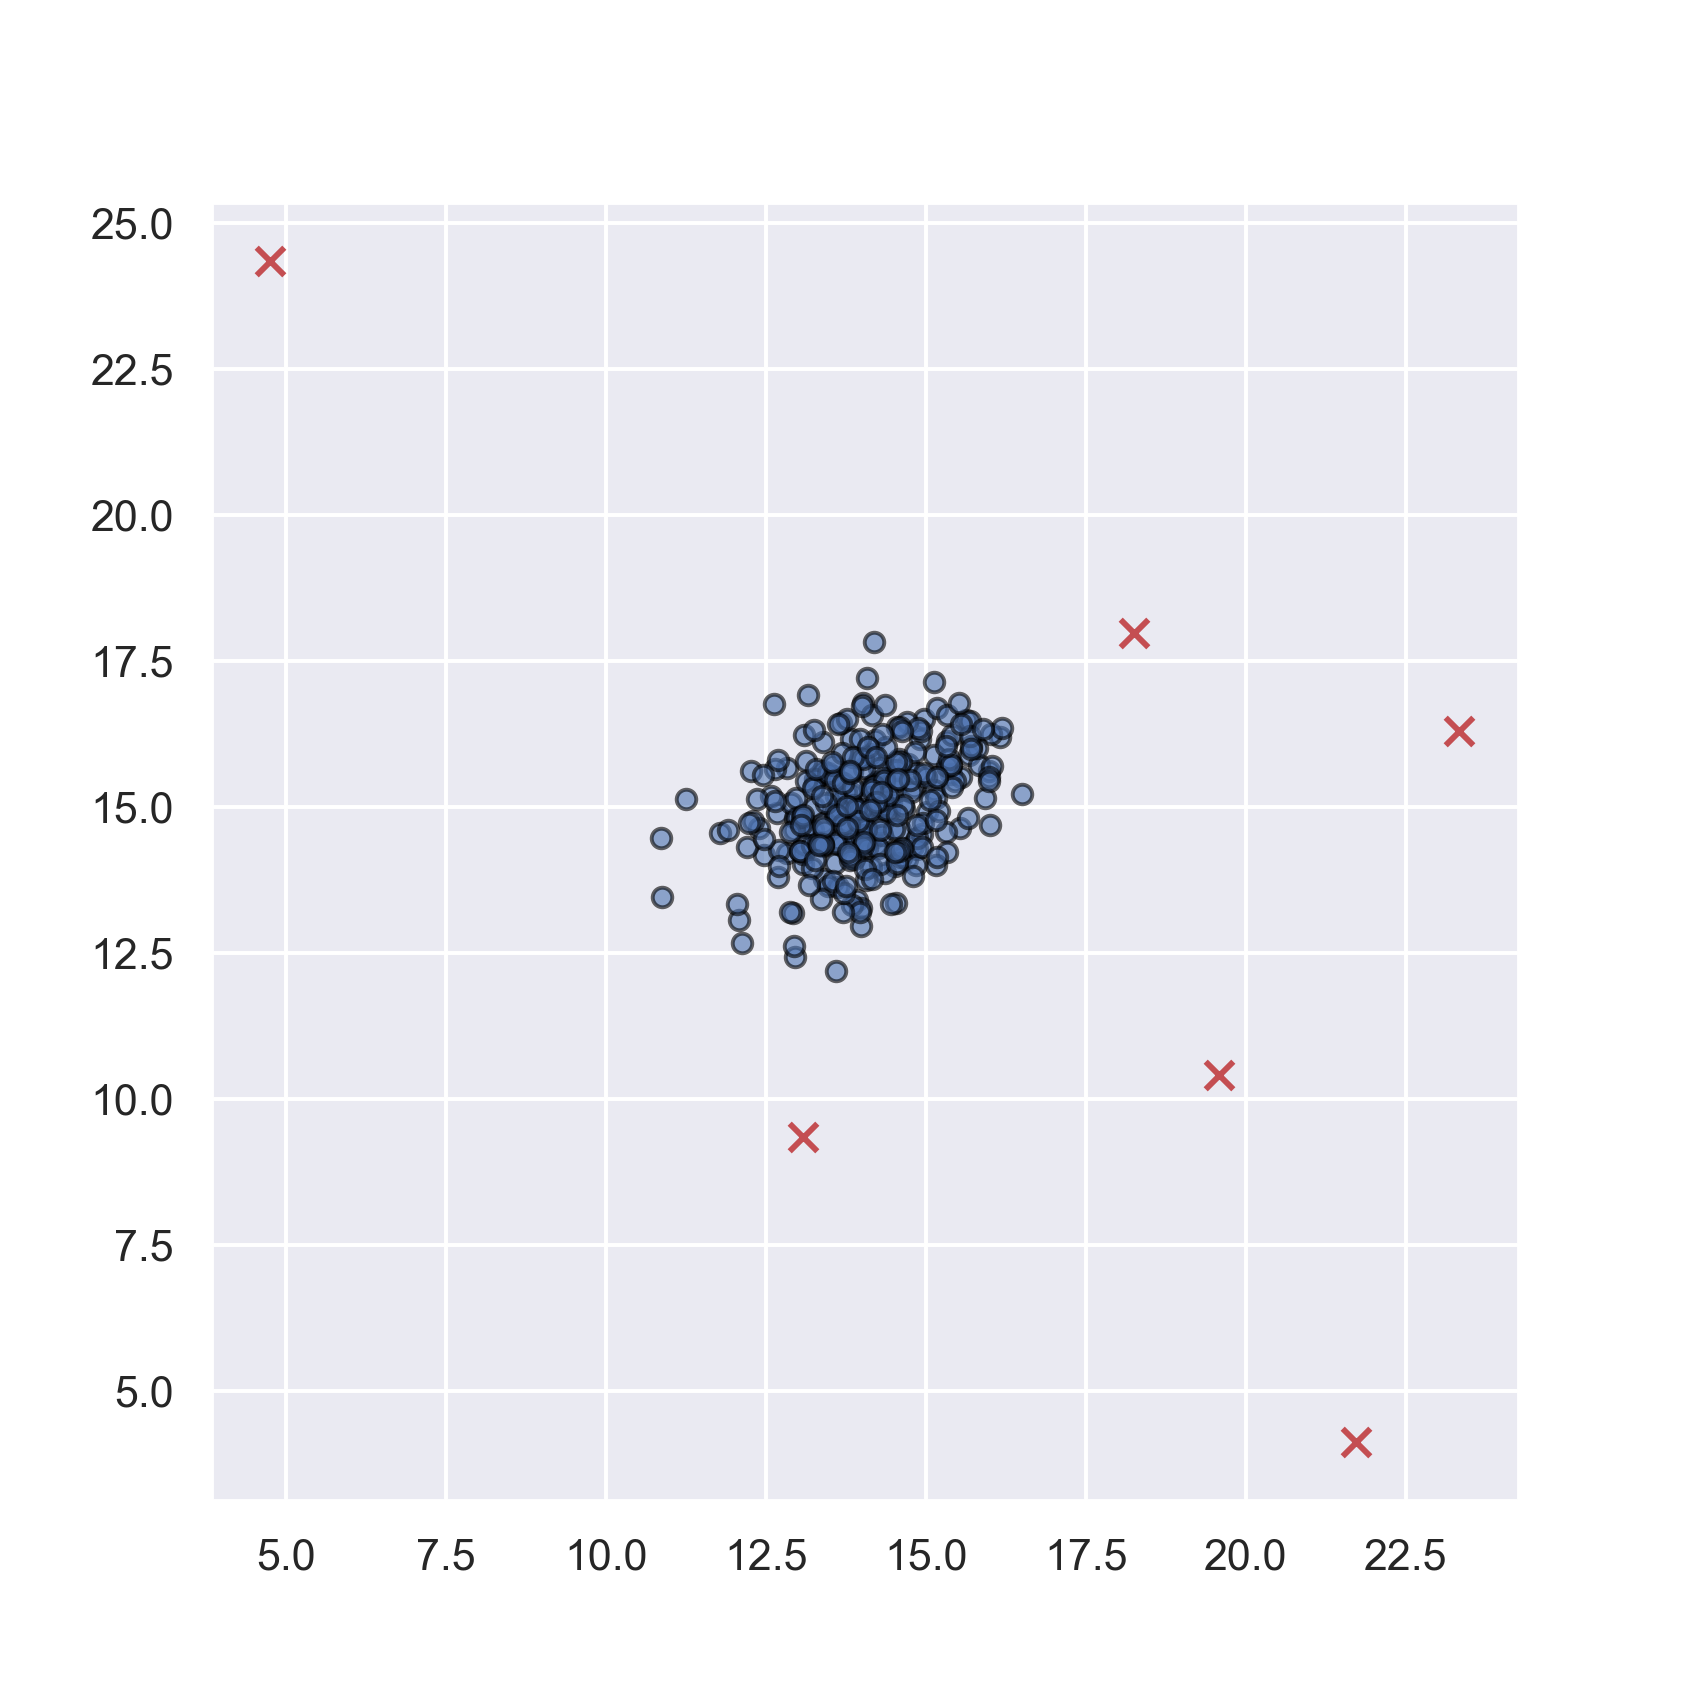

array([[300],
       [301],
       [303],
       [304],
       [305],
       [306]], dtype=int64)

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
normal = X[p >= 0.001]
outlier = X[p < 0.001]
ax.scatter(normal[:, 0], normal[:, 1], s=25, marker='o', c='b', edgecolors = "black",cmap='coolwarm', alpha=0.6)
ax.scatter(outlier[:, 0], outlier[:, 1], s=50, marker='x', c='r',  cmap='coolwarm')
plt.show()

np.argwhere(p < 0.001)

# Anomaly detection as an algorithm

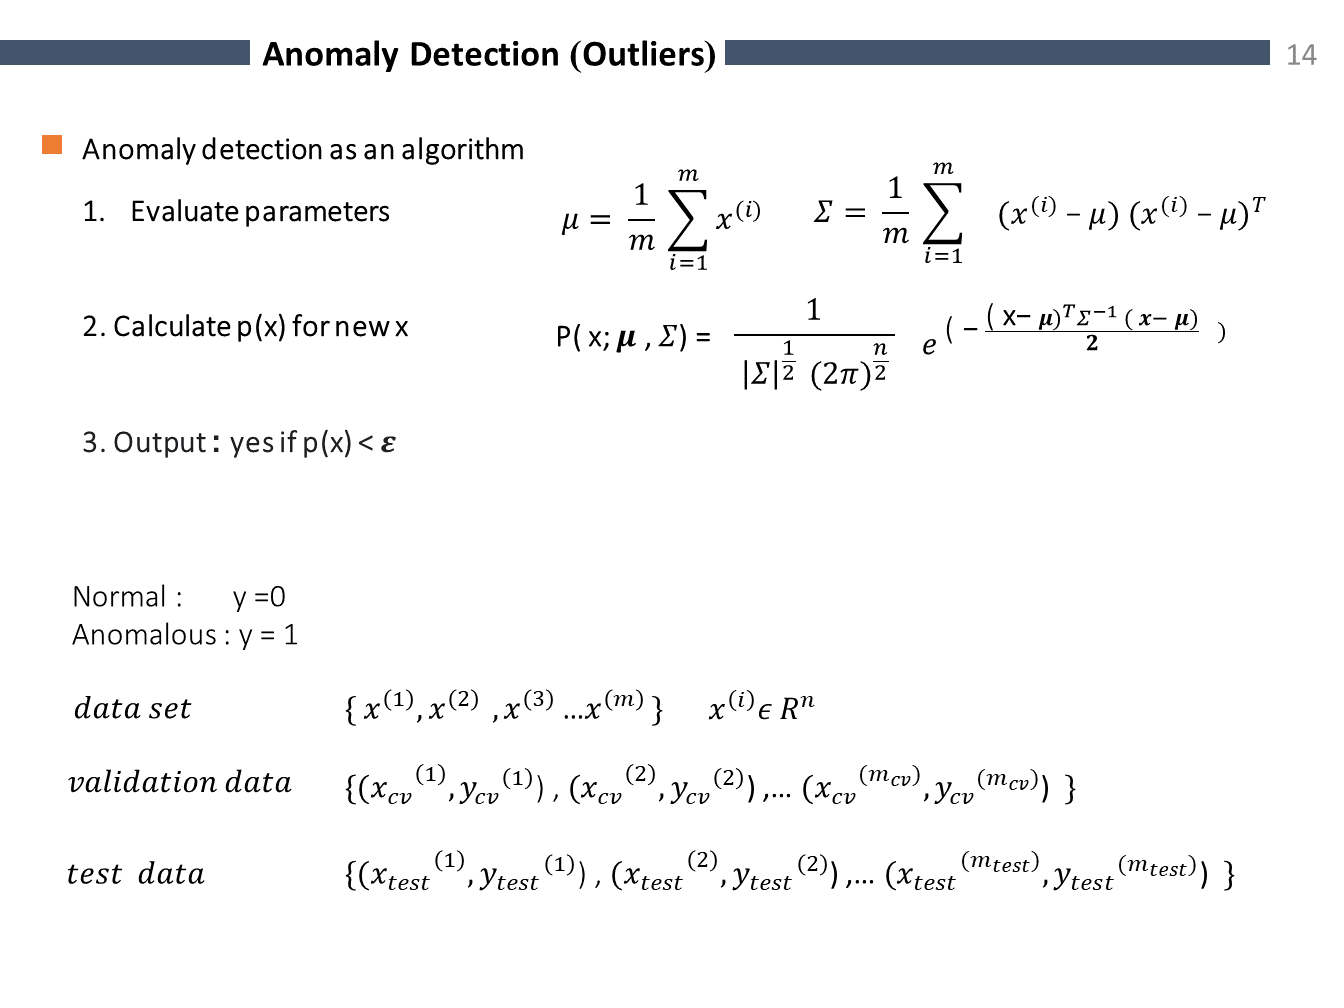

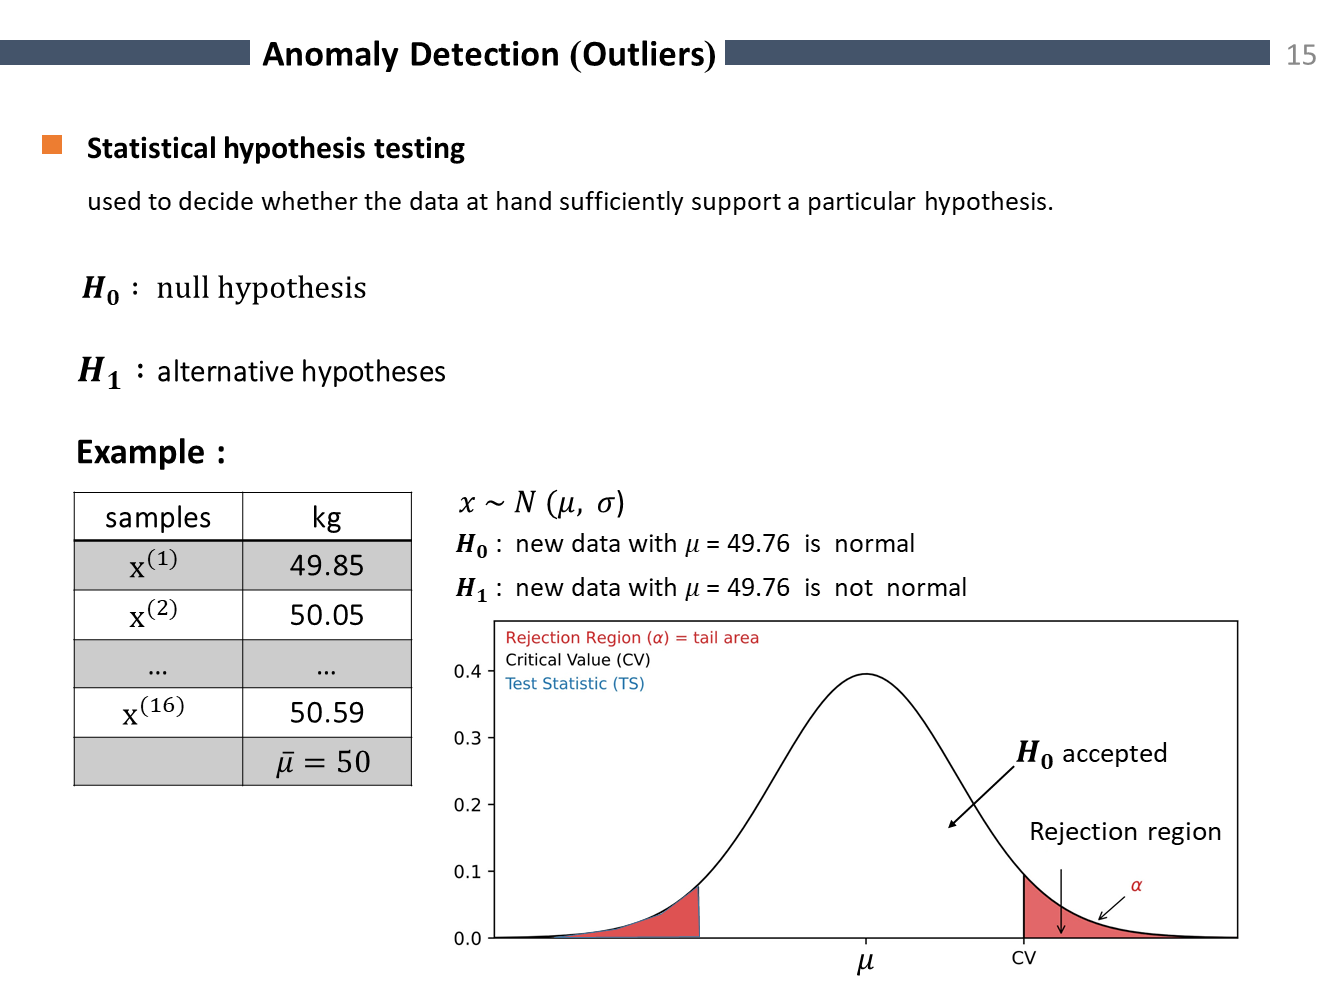

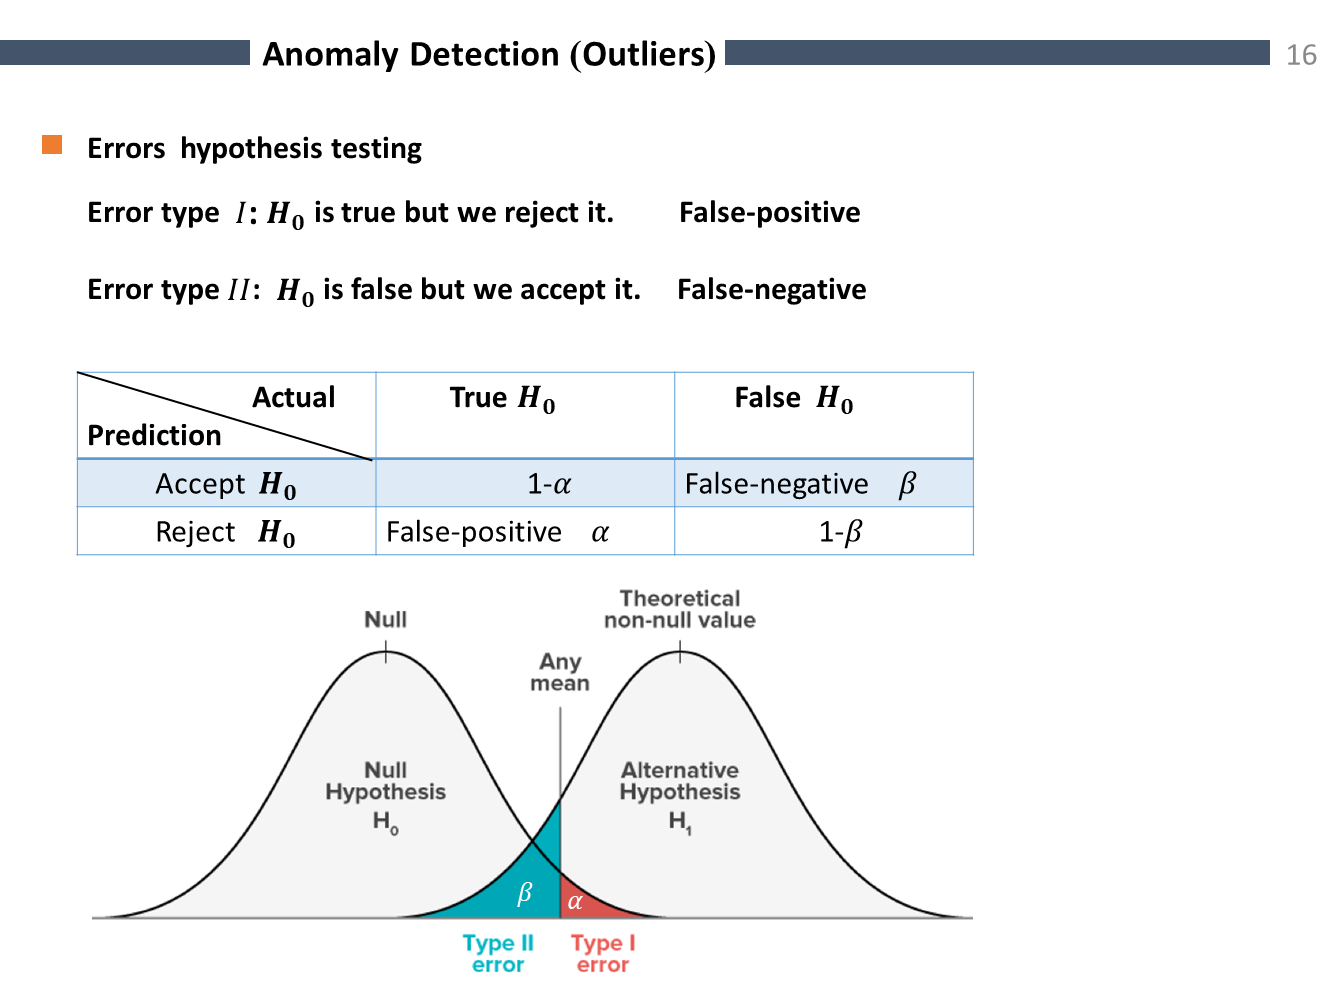

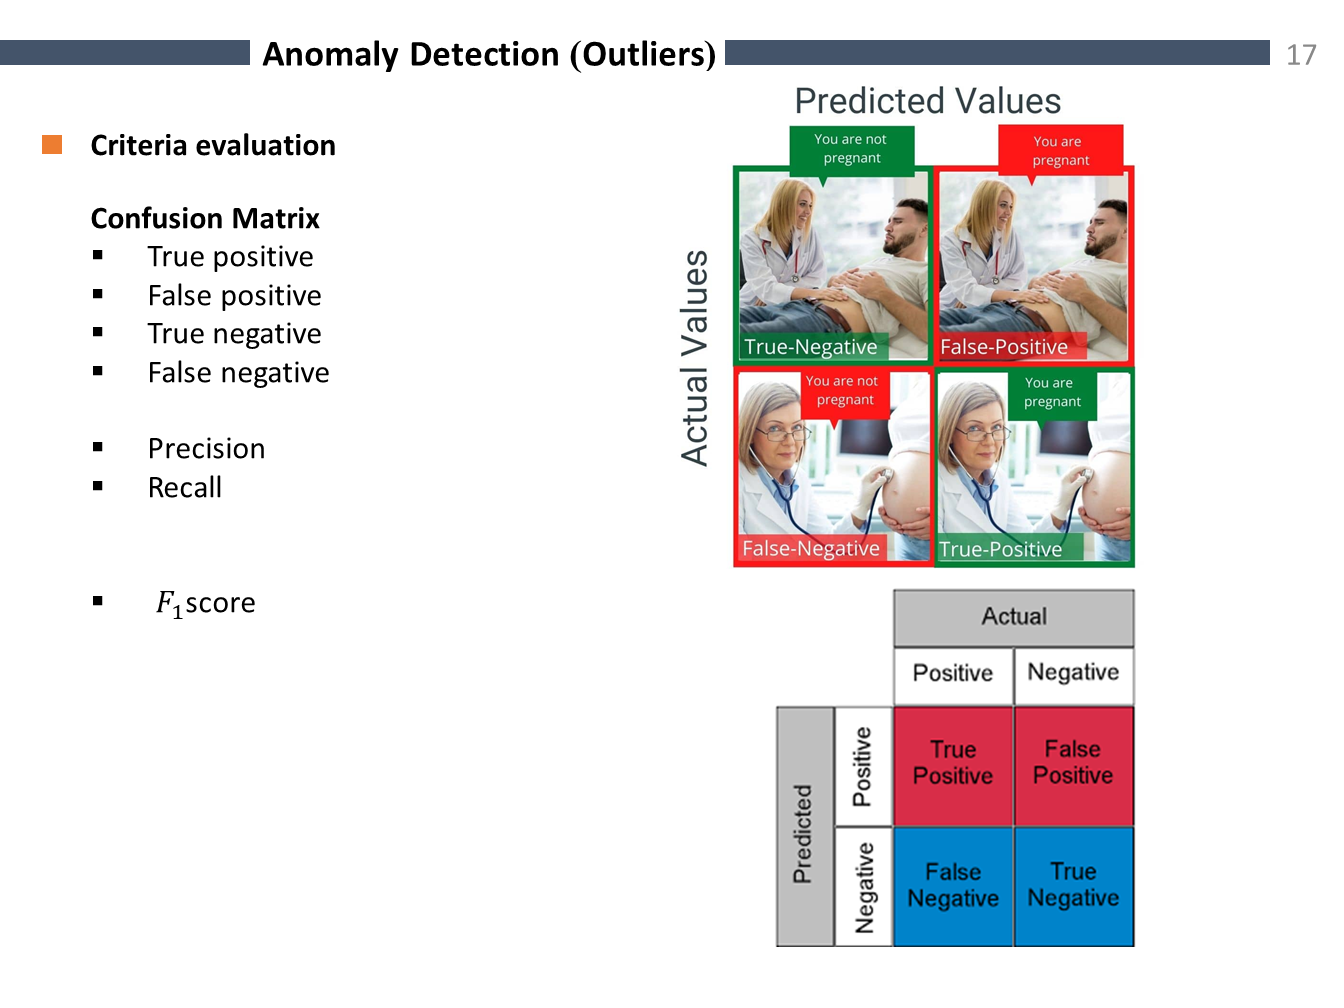

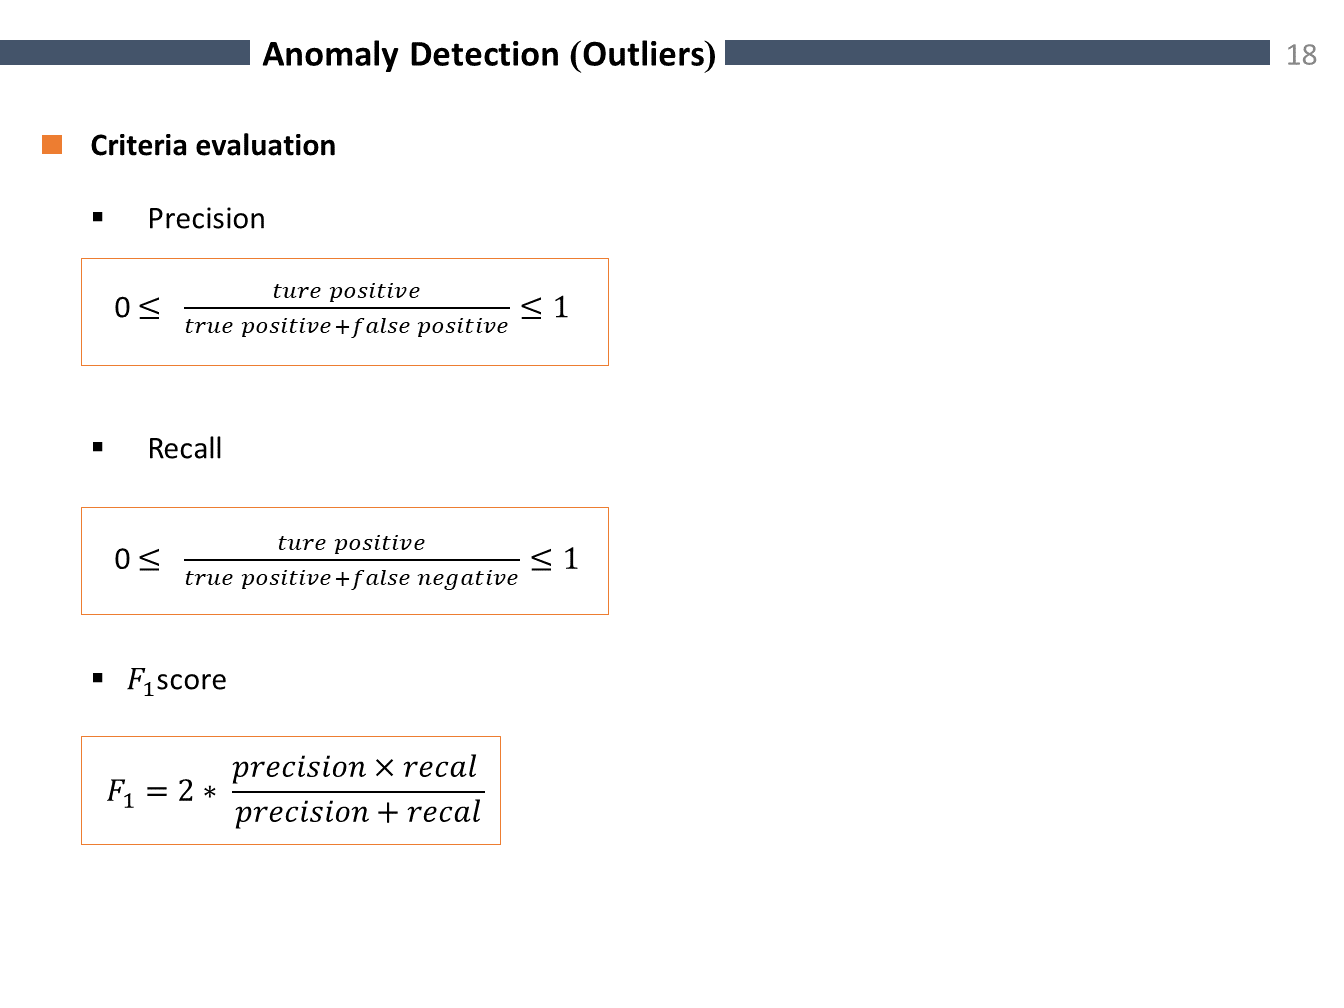

In [17]:

import numpy as np
def read_dataset(fname, delimiter=','):
    return np.genfromtxt(fname, delimiter=delimiter)

X_train = read_dataset(r"F:\machine learning\jozavat\anomally\test train vald\train.csv")   #train dataset
print(X_train.shape)
print(X_train[:5])

print("---------------------------------------")

data_validation = read_dataset(r"F:\machine learning\jozavat\anomally\test train vald\validation.csv")  # validation dataset

print(data_validation.shape)
print(data_validation[:5])

print("---------------------------------------")

data_test = read_dataset(r"F:\machine learning\jozavat\anomally\test train vald\test.csv")   #test

print(data_test.shape)
print(data_test[-1:-6:-1])


(245, 2)
[[13.05 14.74]
 [13.41 13.76]
 [14.2  15.85]
 [14.91 16.17]
 [13.58 14.04]]
---------------------------------------
(31, 3)
[[13.03 14.25  0.  ]
 [14.53 15.77  0.  ]
 [13.25 16.32  0.  ]
 [13.24 15.34  0.  ]
 [12.13 12.67  0.  ]]
---------------------------------------
(31, 3)
[[ 4.75 24.35  0.  ]
 [18.26 17.98  1.  ]
 [23.34 16.3   1.  ]
 [19.58 10.41  1.  ]
 [21.73  4.13  0.  ]]


In [18]:
#using data validation

def select_threshold(p_valid, y_valid):      #probs : p   
    best_epsilon = 0
    best_f1 = 0
    
    
    stepsize = (max(p_valid) - min(p_valid)) / 1000;
    epsilons = np.arange(min(p_valid), max(p_valid), stepsize)     #arange return evenly spaced values within a given interval.
    
    for epsilon in np.nditer(epsilons):                     #  دونه دونه اعضای یک ارایه را برمیگرداند

        # PREDICT OUTLIERS
        y_pred = (p_valid < epsilon)                     #اونهایی که احتمالشون کوچکتر تز اپسیلونه 
        
        # calculate TP, FP and FN
        tp = np.sum((y_pred == 1) & (data_validation [: ,2] == 1)) * 1.0
        fp = np.sum((y_pred == 1) & (data_validation [: ,2] == 0)) * 1.0
        fn = np.sum((y_pred == 0) & (data_validation [: ,2] == 1)) * 1.0                #0 یعنی معیوب نبودن
        
        # calculate Precision, Recall and F1-score
        precision = tp / (tp + fp)
        recall    = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_f1, best_epsilon











In [19]:
# STEP 1: estimate parameters mu and sigma from X_val
mu_validation = np.mean((data_validation[ : , 0:2 ]), axis=0)
Sigma_val = np.cov((data_validation[ : , 0:2 ]).T)

# STEP 2: calculate probabilities
p_val = multivariate_normal(mean=mu_validation, cov=Sigma_val).pdf(data_validation[ : , 0:2 ])

# STEP 3: choose best value for epsilon
f1, eps = select_threshold(p_val, data_validation [: ,2])
print("f1 = {:.2g}, epsilon = {}".format(f1, eps))


f1 = 0.57, epsilon = 0.022173060113477056


In [20]:
y_pred = (p_valid < epsilon)                     #اونهایی که احتمالشون کوچکتر تز اپسیلونه 
        
# calculate TP, FP and FN
tp = np.sum((y_pred == 1) & (data_validation [: ,2] == 1)) * 1.0
fp = np.sum((y_pred == 1) & (data_validation [: ,2] == 0)) * 1.0
fn = np.sum((y_pred == 0) & (data_validation [: ,2] == 1)) * 1.0                #0 یعنی معیوب نبودن
        
# calculate Precision, Recall and F1-score
precision = tp / (tp + fp)
recall  = tp / (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)

NameError: name 'p_valid' is not defined

In [ ]:
np.argwhere(p_val<0.022173060113477056)

<IPython.core.display.Javascript object>


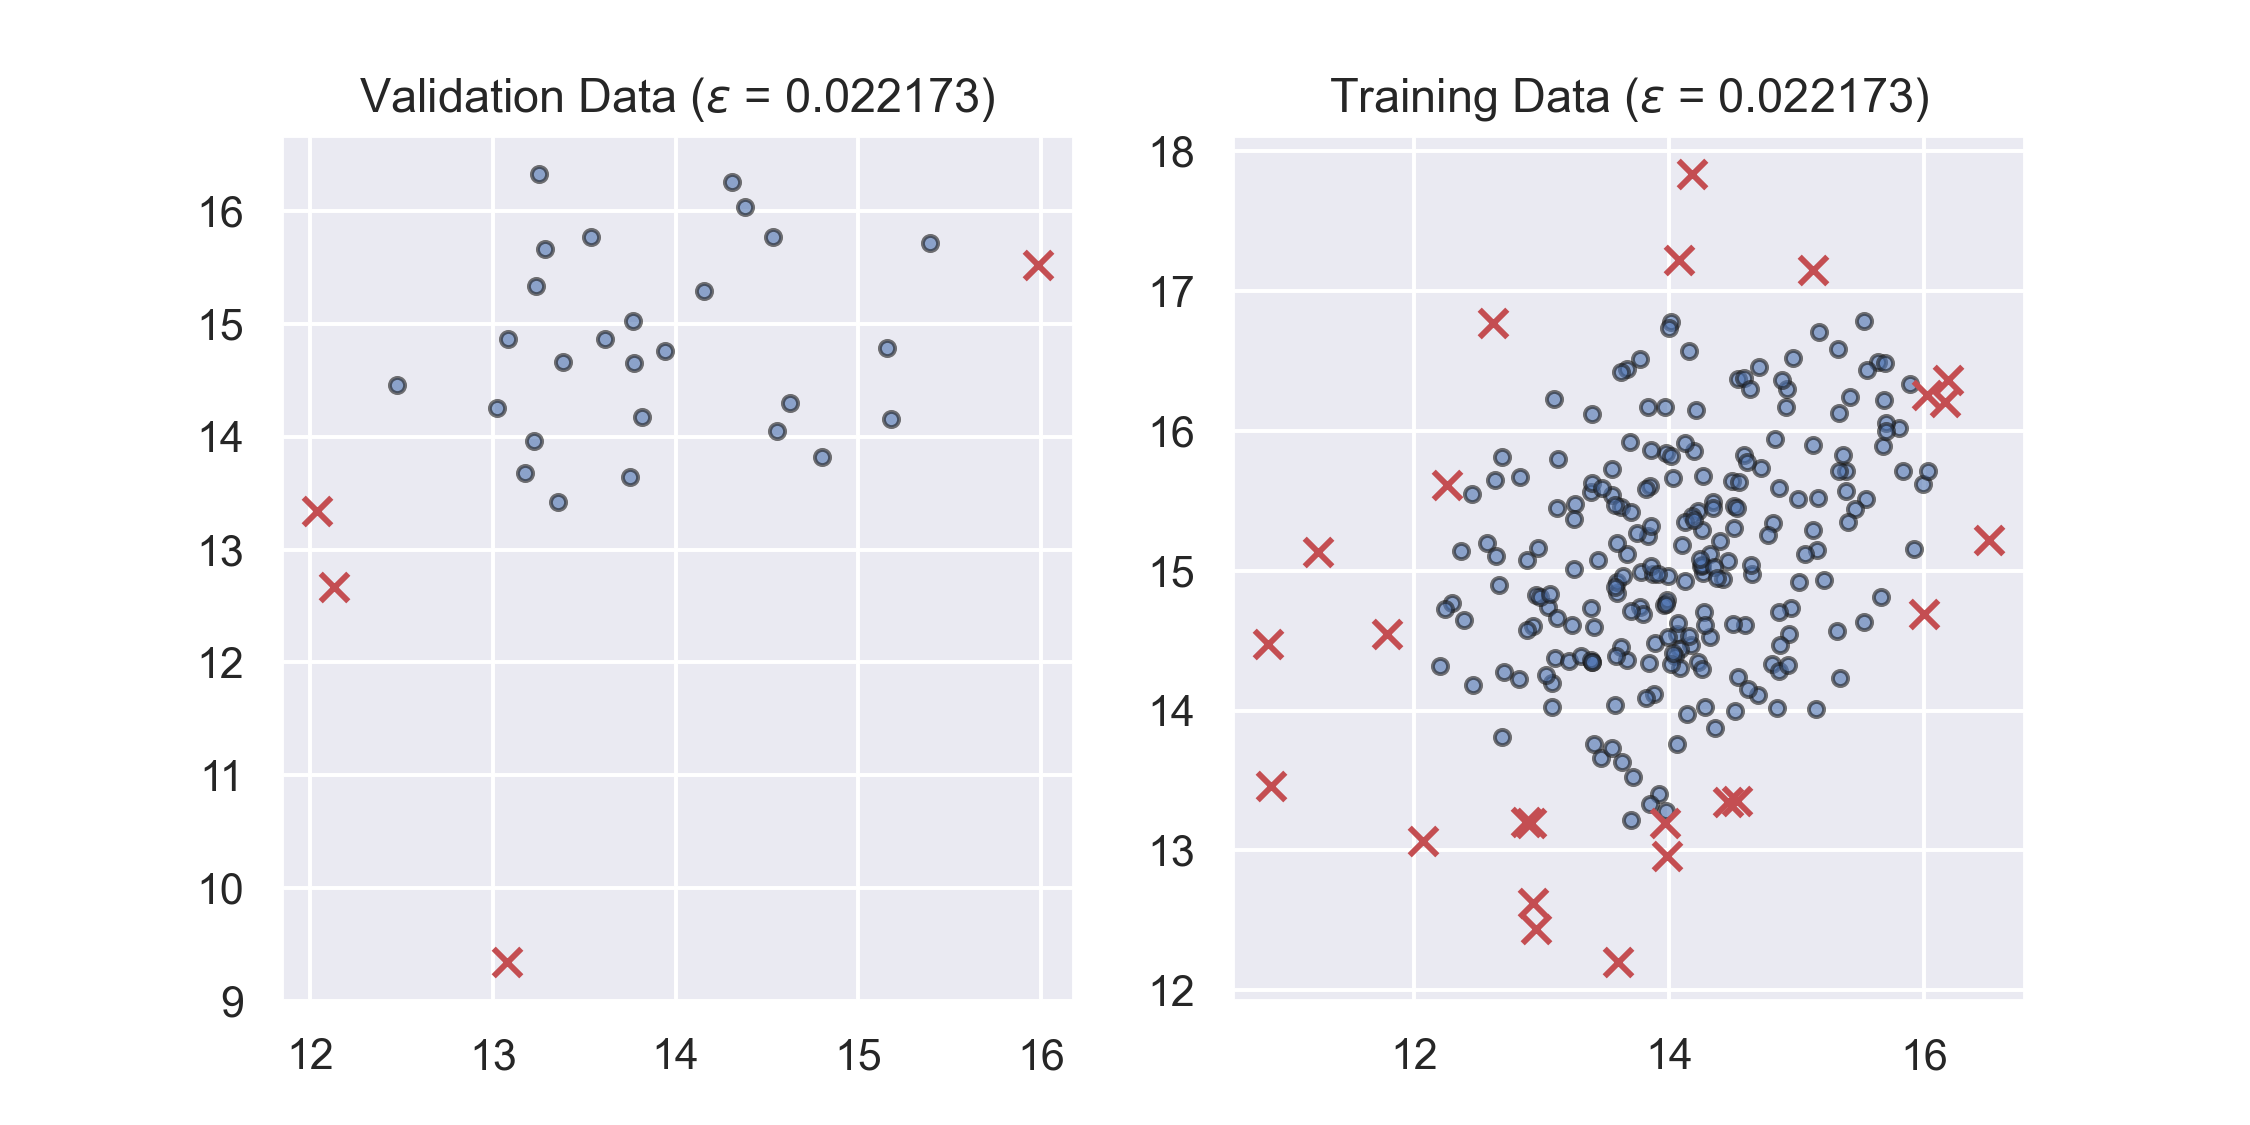

In [9]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter((data_validation[ : , 0:2 ])[p_val >= eps, 0], (data_validation[ : , 0:2 ])[p_val >= eps, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter((data_validation[ : , 0:2 ])[p_val <  eps, 0], (data_validation[ : , 0:2 ])[p_val <  eps, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('Validation Data ($\epsilon$ = {:.5g})'.format(eps))

plt.subplot(122)
mu = np.mean(X_train, axis=0)
sigma = np.cov(X_train.T)
p = multivariate_normal(mean=mu, cov=sigma).pdf(X_train)
plt.scatter(X_train[p >= eps, 0], X_train[p >= eps, 1], s=15, marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_train[p <  eps, 0], X_train[p <  eps, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('Training Data ($\epsilon$ = {:.5g})'.format(eps))

plt.show()

# Sklearn Novelty and Outlier Detection

In [10]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest()
IF.fit (X_train)           # b u i l d the t r e e s
a=IF.predict(data_test[ : , 0:2 ])
print(a)
print(data_test[ : , 2 ])

[ 1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0.]


In [11]:
from sklearn.metrics import f1_score
f1_score(a, data_test[ : , 2 ] ,average= None )

array([0., 0., 0.])